#**Team Members**
## Name: Apoorv Yadav (19BCE1163)
## Name: Shushant Kumar Singh (19BCE1620)
## Name: Rishi Mungia (19BCE1647)


# Covid 19 Impact on Digital Learning Platforms
## Data Analytics

Covid 19 pandemic has been with us for almost 2 years. Everyone on earth struggle, fight to survive from this virus. One of the major impact is students all over the world. They cannot go to school to get face to face learning at school, impact heavily to their social life, including play with friends as part of learning process.

On the other hand, this pandemic has forced all students to engage more with internet, do everything using internet, including learning and study must be done from home. Digital learning platforms growth exponentially than ever before. User engagement to the internet reach the highest in history and continuously growing.

This analysis is done to explore and show how is the data can show us the picture of digital connectivity and engagement in 2020, effect of the Covid-19 pandemic on online distance learning, and how this also evolve in the future.

Although the dataset only include student in the United States, similar approach is done in every country.


# Problem Statement

The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

# Data Preparation

we load all core libraries will be used in this data analysis.

In [ ]:
install.packages('usethis')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
setwd(dir = '/content/')
download.file(url = "https://github.com/Apoorv-17/Covid-19-Impact-on-Digital-Learning/archive/refs/heads/master.zip"
                                   , destfile = "dataset.zip")

In [ ]:
unzip(zipfile = 'dataset.zip')

In [ ]:
install.packages("plyr")
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pacman)

In [ ]:
library(tidyverse)
library(plyr)
library(dplyr)
library(lubridate)
library(janitor)
library(skimr)
options(warn=-1)

In [ ]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

Load dataset from csv files.

## District Info

In [ ]:
districts_info <- read_csv("/content/Covid-19-Impact-on-Digital-Learning-master/districts_info.csv")

Rows: 233 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, locale, pct_black/hispanic, pct_free/reduced, county_connect...
dbl (1): district_id


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Clean column names.

In [ ]:
districts_info <- districts_info %>% clean_names()
glimpse(districts_info)

Rows: 233
Columns: 7
$ district_id              <dbl> 8815, 2685, 4921, 3188, 2238, 5987, 3710, 717…
$ state                    <chr> "Illinois", "NaN", "Utah", "NaN", "NaN", "Wis…
$ locale                   <chr> "Suburb", "NaN", "Suburb", "NaN", "NaN", "Sub…
$ pct_black_hispanic       <chr> "[0, 0.2[", "NaN", "[0, 0.2[", "NaN", "NaN", …
$ pct_free_reduced         <chr> "[0, 0.2[", "NaN", "[0.2, 0.4[", "NaN", "NaN"…
$ county_connections_ratio <chr> "[0.18, 1[", "NaN", "[0.18, 1[", "NaN", "NaN"…
$ pp_total_raw             <chr> "[14000, 16000[", "NaN", "[6000, 8000[", "NaN…


Rename and clean data, remove unnecessary characters.

In [ ]:
colnames(districts_info) <- c("district_id", "state", "locale", "pct_black_hispanic", "pct_free_reduced", "country_connection_ratio", "pp_total_raw")
districts_info$pct_black_hispanic <- gsub("\\[", "", as.character(districts_info$pct_black_hispanic))
districts_info$pct_free_reduced <- gsub("\\[", "", as.character(districts_info$pct_free_reduced))
districts_info$country_connection_ratio <- gsub("\\[", "", as.character(districts_info$country_connection_ratio))
districts_info$pp_total_raw <- gsub("\\[", "", as.character(districts_info$pp_total_raw))
glimpse(districts_info)

Rows: 233
Columns: 7
$ district_id              <dbl> 8815, 2685, 4921, 3188, 2238, 5987, 3710, 717…
$ state                    <chr> "Illinois", "NaN", "Utah", "NaN", "NaN", "Wis…
$ locale                   <chr> "Suburb", "NaN", "Suburb", "NaN", "NaN", "Sub…
$ pct_black_hispanic       <chr> "0, 0.2", "NaN", "0, 0.2", "NaN", "NaN", "0, …
$ pct_free_reduced         <chr> "0, 0.2", "NaN", "0.2, 0.4", "NaN", "NaN", "0…
$ country_connection_ratio <chr> "0.18, 1", "NaN", "0.18, 1", "NaN", "NaN", "0…
$ pp_total_raw             <chr> "14000, 16000", "NaN", "6000, 8000", "NaN", "…


Split data for some columns.

Clean some NaN to *NA* value.

In [ ]:
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(naniar)
districts_info <- districts_info %>% replace_with_na_all(condition = ~.x == "NaN")
districts_info <- districts_info %>% separate(pct_black_hispanic, c("pct_black", "pct_hispanic"), sep=",") %>% 
  separate(pct_free_reduced, c("pct_free", "pct_reduced"), sep=",") %>% 
  separate(country_connection_ratio, c("country_connection", "country_ratio"), sep=",") %>%
  separate(pp_total_raw, c("pp_total", "pp_raw"), sep=",")
c_district <- districts_info
as.double(as.double(c_district$district_id))
as.double(as.double(c_district$pct_black))
as.double(as.double(c_district$pct_hispanic))
as.double(as.double(c_district$pct_free))
as.double(as.double(c_district$pct_reduced))
as.double(as.double(c_district$country_connection))
as.numeric(as.double(c_district$country_ratio))
as.numeric(as.double(c_district$pp_total))
as.numeric(as.double(c_district$pp_raw))

[1] 8815 2685 4921 3188 2238 5987 3710 7177 9812 6584 1044 7457 1904 5527 2257
 [16] 7614 4808 8515 1877 2339 2779 8328 8539 9120 9043 4666 1549 4051 7305 1131
 [31] 4591 3393 3580 2167 6577 4602 4936 4520 7785 3668 7970 5231 9589 8685 8433
 [46] 2165 1179 2074 1142 7964 8784 7798 3550 1444 2601 7660 9899 1742 4629 4569
 [61] 4949 6250 8425 6418 1558 3222 1772 5604 9007 8884 8184 1712 3412 4029 5257
 [76] 5903 6165 2940 5042 3692 4683 7858 2567 2321 7767 7308 5006 9140 5380 8902
 [91] 5890 4031 2017 6640 6194 3864 9839 2598 5600 2991 7352 4749 2106 2549 6919
[106] 7980 3371 1584 2060 7387 3471 1000 5150 2956 9553 1536 8937 1791 4516 2872
[121] 2439 8520 2130 3772 4775 3959 9778 5524 1470 5802 1324 3160 2393 4203 9230
[136] 3248 7086 8556 7829 5627 4550 7752 2729 6049 4348 3986 9537 1052 6762 4408
[151] 3670 1204 2870 6721 3558 9729 5970 1450 3080 8017 2517 1570 4937 4668 1039
[166] 6055 6665 5057 2209 2285 2172 7741 6998 3322 8796 4083 3936 7675 4744 9478
[181] 7541 3301 8723 1270 8076 6066 6131 1624 6345 8160 8702 4183 9357 8845 5510
[196] 6104 3228 5422 8127 4165 3640 8256 1857 5479 3314 8748 4373 7342 6046 7723
[211] 6774 5934 9927 2441 6144 3390 5404 4314 9536 6512 3732 2201 9463 9303 3266
[226] 1965 5882 1705 9515 8103 4929 7975 7164

[1] 0.0  NA 0.0  NA  NA 0.0 0.0 0.2 0.0 0.4 0.0 0.4 0.0 0.0 0.0 0.2 0.8  NA
 [19] 0.0  NA 0.0 0.0 0.2  NA 0.8  NA 0.0 0.0 0.0  NA  NA  NA  NA 0.0 0.0 0.6
 [37] 0.0 0.0 0.0 0.0 0.0 0.0 0.2  NA 0.0 0.2  NA 0.4 0.0 0.8 0.6 0.0 0.4 0.0
 [55] 0.6 0.0 0.2 0.0 0.0 0.6 0.0 0.0 0.0 0.4 0.0 0.2 0.2 0.0 0.8 0.6  NA 0.4
 [73] 0.6  NA  NA  NA  NA 0.0 0.2 0.0 0.4  NA 0.0 0.0 0.4 0.0 0.0 0.0  NA 0.0
 [91] 0.2 0.2  NA 0.0 0.0 0.0  NA 0.0 0.0 0.0  NA  NA 0.2  NA 0.4 0.0  NA  NA
[109] 0.4 0.0  NA 0.6 0.0 0.0 0.0 0.0 0.0 0.6 0.4 0.0 0.0 0.0 0.4 0.0 0.0  NA
[127] 0.0 0.0 0.0 0.0 0.0 0.0 0.0  NA 0.0 0.6  NA 0.0  NA 0.0 0.8 0.0 0.0  NA
[145] 0.0 0.0 0.0 0.2 0.0  NA 0.0 0.0 0.8  NA 0.2  NA  NA 0.0 0.2  NA 0.0 0.2
[163]  NA 0.0  NA 0.0  NA  NA  NA 0.0 0.0 0.0 0.0 0.0  NA 0.0 0.0 0.0 0.2 0.0
[181] 0.2  NA  NA 0.0 0.0  NA  NA  NA 0.2  NA  NA 0.0 0.4  NA 0.2 0.2 0.0 0.0
[199] 0.2  NA 0.0 0.0 0.0 0.8 0.0 0.0 0.0 0.0 0.0 0.4  NA 0.0 0.0 0.0 0.4  NA
[217]  NA 0.0 0.8 0.0 0.4 0.4  NA 0.0 0.0 0.0 0.0 0.2 0.0 0.2 0.0 0.6 0.6

[1] 0.2  NA 0.2  NA  NA 0.2 0.2 0.4 0.2 0.6 0.2 0.6 0.2 0.2 0.2 0.4 1.0  NA
 [19] 0.2  NA 0.2 0.2 0.4  NA 1.0  NA 0.2 0.2 0.2  NA  NA  NA  NA 0.2 0.2 0.8
 [37] 0.2 0.2 0.2 0.2 0.2 0.2 0.4  NA 0.2 0.4  NA 0.6 0.2 1.0 0.8 0.2 0.6 0.2
 [55] 0.8 0.2 0.4 0.2 0.2 0.8 0.2 0.2 0.2 0.6 0.2 0.4 0.4 0.2 1.0 0.8  NA 0.6
 [73] 0.8  NA  NA  NA  NA 0.2 0.4 0.2 0.6  NA 0.2 0.2 0.6 0.2 0.2 0.2  NA 0.2
 [91] 0.4 0.4  NA 0.2 0.2 0.2  NA 0.2 0.2 0.2  NA  NA 0.4  NA 0.6 0.2  NA  NA
[109] 0.6 0.2  NA 0.8 0.2 0.2 0.2 0.2 0.2 0.8 0.6 0.2 0.2 0.2 0.6 0.2 0.2  NA
[127] 0.2 0.2 0.2 0.2 0.2 0.2 0.2  NA 0.2 0.8  NA 0.2  NA 0.2 1.0 0.2 0.2  NA
[145] 0.2 0.2 0.2 0.4 0.2  NA 0.2 0.2 1.0  NA 0.4  NA  NA 0.2 0.4  NA 0.2 0.4
[163]  NA 0.2  NA 0.2  NA  NA  NA 0.2 0.2 0.2 0.2 0.2  NA 0.2 0.2 0.2 0.4 0.2
[181] 0.4  NA  NA 0.2 0.2  NA  NA  NA 0.4  NA  NA 0.2 0.6  NA 0.4 0.4 0.2 0.2
[199] 0.4  NA 0.2 0.2 0.2 1.0 0.2 0.2 0.2 0.2 0.2 0.6  NA 0.2 0.2 0.2 0.6  NA
[217]  NA 0.2 1.0 0.2 0.6 0.6  NA 0.2 0.2 0.2 0.2 0.4 0.2 0.4 0.2 0.8 0.8

[1] 0.0  NA 0.2  NA  NA 0.0 0.4 0.2 0.2 0.6 0.0 0.4 0.0  NA 0.2 0.2 0.8  NA
 [19] 0.0  NA 0.0 0.4 0.4  NA 0.8  NA 0.2 0.2  NA  NA  NA  NA  NA 0.0 0.0 0.2
 [37] 0.0 0.2 0.0  NA 0.0 0.4 0.2  NA 0.0 0.2  NA 0.2 0.2  NA 0.6 0.2 0.6 0.4
 [55] 0.4 0.0 0.0 0.2 0.2 0.4  NA 0.2 0.0  NA 0.0 0.6 0.4 0.0  NA 0.4  NA 0.4
 [73] 0.4  NA  NA  NA  NA 0.2 0.8 0.4 0.4  NA 0.2 0.0 0.6 0.2  NA 0.2  NA 0.2
 [91] 0.2 0.4  NA  NA 0.0 0.0  NA 0.0 0.2 0.0  NA  NA 0.0  NA 0.4 0.4  NA  NA
[109]  NA 0.2  NA 0.2 0.2 0.4 0.0 0.4 0.0 0.6 0.4 0.0  NA 0.2 0.6 0.2 0.2  NA
[127] 0.4  NA 0.4 0.4 0.4 0.2 0.0  NA 0.0 0.6  NA  NA  NA 0.4 0.6 0.0 0.0  NA
[145] 0.2  NA 0.0 0.2 0.0  NA 0.4 0.0 0.6  NA 0.2  NA  NA 0.0  NA  NA  NA 0.2
[163]  NA 0.2  NA 0.0  NA  NA  NA 0.4 0.0 0.0 0.0 0.0  NA 0.2 0.2  NA 0.2 0.0
[181] 0.2  NA  NA 0.4 0.2  NA  NA  NA  NA  NA  NA 0.4 0.2  NA 0.4 0.2 0.4 0.2
[199] 0.2  NA 0.0 0.0 0.2  NA 0.0  NA 0.0  NA 0.0  NA  NA 0.0  NA 0.2 0.6  NA
[217]  NA 0.2 0.8  NA 0.4 0.4  NA  NA 0.4  NA  NA 0.4 0.4  NA 0.4 0.6 0.6

[1] 0.2  NA 0.4  NA  NA 0.2 0.6 0.4 0.4 0.8 0.2 0.6 0.2  NA 0.4 0.4 1.0  NA
 [19] 0.2  NA 0.2 0.6 0.6  NA 1.0  NA 0.4 0.4  NA  NA  NA  NA  NA 0.2 0.2 0.4
 [37] 0.2 0.4 0.2  NA 0.2 0.6 0.4  NA 0.2 0.4  NA 0.4 0.4  NA 0.8 0.4 0.8 0.6
 [55] 0.6 0.2 0.2 0.4 0.4 0.6  NA 0.4 0.2  NA 0.2 0.8 0.6 0.2  NA 0.6  NA 0.6
 [73] 0.6  NA  NA  NA  NA 0.4 1.0 0.6 0.6  NA 0.4 0.2 0.8 0.4  NA 0.4  NA 0.4
 [91] 0.4 0.6  NA  NA 0.2 0.2  NA 0.2 0.4 0.2  NA  NA 0.2  NA 0.6 0.6  NA  NA
[109]  NA 0.4  NA 0.4 0.4 0.6 0.2 0.6 0.2 0.8 0.6 0.2  NA 0.4 0.8 0.4 0.4  NA
[127] 0.6  NA 0.6 0.6 0.6 0.4 0.2  NA 0.2 0.8  NA  NA  NA 0.6 0.8 0.2 0.2  NA
[145] 0.4  NA 0.2 0.4 0.2  NA 0.6 0.2 0.8  NA 0.4  NA  NA 0.2  NA  NA  NA 0.4
[163]  NA 0.4  NA 0.2  NA  NA  NA 0.6 0.2 0.2 0.2 0.2  NA 0.4 0.4  NA 0.4 0.2
[181] 0.4  NA  NA 0.6 0.4  NA  NA  NA  NA  NA  NA 0.6 0.4  NA 0.6 0.4 0.6 0.4
[199] 0.4  NA 0.2 0.2 0.4  NA 0.2  NA 0.2  NA 0.2  NA  NA 0.2  NA 0.4 0.8  NA
[217]  NA 0.4 1.0  NA 0.6 0.6  NA  NA 0.6  NA  NA 0.6 0.6  NA 0.6 0.8 0.8

[1] 0.18   NA 0.18   NA   NA 0.18 0.18 0.18 0.18 0.18   NA 0.18 0.18   NA   NA
 [16] 0.18 0.18   NA 0.18   NA 0.18 0.18 0.18   NA 0.18   NA 0.18 0.18 0.18   NA
 [31]   NA   NA   NA 0.18 0.18 0.18 0.18 0.18 0.18 0.18   NA 0.18 0.18   NA 0.18
 [46] 0.18   NA 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18
 [61] 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18   NA 0.18 0.18   NA   NA
 [76]   NA   NA   NA 0.18 0.18 0.18   NA 0.18 0.18 0.18 0.18 0.18   NA   NA 0.18
 [91] 0.18 0.18   NA 0.18 0.18 0.18   NA 0.18 0.18   NA   NA   NA 0.18   NA 0.18
[106] 0.18   NA   NA 0.18 0.18   NA 0.18 0.18 0.18 0.18 0.18 0.18   NA 0.18 1.00
[121]   NA 0.18 0.18 0.18 0.18   NA 0.18 0.18 0.18 0.18 0.18 0.18 0.18   NA 0.18
[136] 0.18   NA 0.18   NA 0.18 0.18 0.18 0.18   NA 0.18 0.18 0.18 0.18 0.18   NA
[151] 0.18 0.18 0.18   NA 0.18   NA   NA 0.18 0.18   NA   NA 0.18   NA 0.18   NA
[166] 0.18   NA   NA   NA 0.18 0.18 0.18 0.18 0.18   NA 0.18   NA 0.18 0.18 0.18
[181] 0.18   NA   NA 0.18 0.18   NA   NA   NA 0.18   NA   NA 0.18 0.18   NA 0.18
[196] 0.18 0.18 0.18 0.18   NA 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18   NA 0.18
[211]   NA   NA   NA 0.18 0.18   NA   NA 0.18 0.18 0.18 0.18 0.18   NA 0.18 0.18
[226] 0.18 0.18 0.18 0.18 0.18 0.18 0.18 0.18

[1]  1 NA  1 NA NA  1  1  1  1  1 NA  1  1 NA NA  1  1 NA  1 NA  1  1  1 NA  1
 [26] NA  1  1  1 NA NA NA NA  1  1  1  1  1  1  1 NA  1  1 NA  1  1 NA  1  1  1
 [51]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 NA  1  1 NA NA
 [76] NA NA NA  1  1  1 NA  1  1  1  1  1 NA NA  1  1  1 NA  1  1  1 NA  1  1 NA
[101] NA NA  1 NA  1  1 NA NA  1  1 NA  1  1  1  1  1  1 NA  1  2 NA  1  1  1  1
[126] NA  1  1  1  1  1  1  1 NA  1  1 NA  1 NA  1  1  1  1 NA  1  1  1  1  1 NA
[151]  1  1  1 NA  1 NA NA  1  1 NA NA  1 NA  1 NA  1 NA NA NA  1  1  1  1  1 NA
[176]  1 NA  1  1  1  1 NA NA  1  1 NA NA NA  1 NA NA  1  1 NA  1  1  1  1  1 NA
[201]  1  1  1  1  1  1  1  1 NA  1 NA NA NA  1  1 NA NA  1  1  1  1  1 NA  1  1
[226]  1  1  1  1  1  1  1  1

[1] 14000    NA  6000    NA    NA 10000  6000  8000  6000  8000 10000 12000
 [13]    NA 16000 20000  8000  8000    NA 12000    NA 10000 10000    NA    NA
 [25] 12000    NA 10000 10000 14000    NA    NA    NA    NA 14000 10000    NA
 [37]  6000    NA    NA 16000    NA 10000    NA    NA 18000  6000    NA    NA
 [49]    NA 18000 10000 22000 14000    NA 12000  6000 12000  8000 16000    NA
 [61] 16000    NA    NA 18000    NA  8000  8000    NA    NA  8000    NA 12000
 [73]    NA    NA    NA    NA    NA 14000 10000  8000  8000    NA 12000    NA
 [85] 10000  4000 14000    NA    NA 10000 18000    NA    NA  8000    NA  6000
 [97]    NA    NA  6000    NA    NA    NA    NA    NA  6000 10000    NA    NA
[109]    NA  6000    NA    NA    NA  8000 14000  8000 12000 10000    NA    NA
[121] 16000 16000 14000  8000 16000    NA  8000 16000 32000    NA  8000  8000
[133] 12000    NA  6000 12000    NA 16000    NA  8000    NA 10000    NA    NA
[145]  8000 16000    NA 16000  4000    NA    NA  6000  8000    NA  8000    NA
[157]    NA    NA 16000    NA 18000    NA    NA  6000    NA    NA    NA    NA
[169]    NA 12000    NA    NA    NA    NA    NA    NA    NA 20000  8000    NA
[181]  8000    NA    NA  8000    NA    NA    NA    NA 12000    NA    NA  8000
[193]    NA    NA 14000    NA  8000  8000    NA    NA    NA 14000    NA 18000
[205]    NA 18000  8000 14000    NA 14000    NA    NA 16000  8000 10000    NA
[217]    NA    NA    NA 14000 12000    NA    NA 14000 10000 22000 14000 12000
[229] 18000  8000 12000    NA    NA

[1] 16000    NA  8000    NA    NA 12000  8000 10000  8000 10000 12000 14000
 [13]    NA 18000 22000 10000 10000    NA 14000    NA 12000 12000    NA    NA
 [25] 14000    NA 12000 12000 16000    NA    NA    NA    NA 16000 12000    NA
 [37]  8000    NA    NA 18000    NA 12000    NA    NA 20000  8000    NA    NA
 [49]    NA 20000 12000 24000 16000    NA 14000  8000 14000 10000 18000    NA
 [61] 18000    NA    NA 20000    NA 10000 10000    NA    NA 10000    NA 14000
 [73]    NA    NA    NA    NA    NA 16000 12000 10000 10000    NA 14000    NA
 [85] 12000  6000 16000    NA    NA 12000 20000    NA    NA 10000    NA  8000
 [97]    NA    NA  8000    NA    NA    NA    NA    NA  8000 12000    NA    NA
[109]    NA  8000    NA    NA    NA 10000 16000 10000 14000 12000    NA    NA
[121] 18000 18000 16000 10000 18000    NA 10000 18000 34000    NA 10000 10000
[133] 14000    NA  8000 14000    NA 18000    NA 10000    NA 12000    NA    NA
[145] 10000 18000    NA 18000  6000    NA    NA  8000 10000    NA 10000    NA
[157]    NA    NA 18000    NA 20000    NA    NA  8000    NA    NA    NA    NA
[169]    NA 14000    NA    NA    NA    NA    NA    NA    NA 22000 10000    NA
[181] 10000    NA    NA 10000    NA    NA    NA    NA 14000    NA    NA 10000
[193]    NA    NA 16000    NA 10000 10000    NA    NA    NA 16000    NA 20000
[205]    NA 20000 10000 16000    NA 16000    NA    NA 18000 10000 12000    NA
[217]    NA    NA    NA 16000 14000    NA    NA 16000 12000 24000 16000 14000
[229] 20000 10000 14000    NA    NA

In [ ]:
glimpse(c_district)

Rows: 233
Columns: 11
$ district_id        <dbl> 8815, 2685, 4921, 3188, 2238, 5987, 3710, 7177, 981…
$ state              <chr> "Illinois", NA, "Utah", NA, NA, "Wisconsin", "Utah"…
$ locale             <chr> "Suburb", NA, "Suburb", NA, NA, "Suburb", "Suburb",…
$ pct_black          <chr> "0", NA, "0", NA, NA, "0", "0", "0.2", "0", "0.4", …
$ pct_hispanic       <chr> " 0.2", NA, " 0.2", NA, NA, " 0.2", " 0.2", " 0.4",…
$ pct_free           <chr> "0", NA, "0.2", NA, NA, "0", "0.4", "0.2", "0.2", "…
$ pct_reduced        <chr> " 0.2", NA, " 0.4", NA, NA, " 0.2", " 0.6", " 0.4",…
$ country_connection <chr> "0.18", NA, "0.18", NA, NA, "0.18", "0.18", "0.18",…
$ country_ratio      <chr> " 1", NA, " 1", NA, NA, " 1", " 1", " 1", " 1", " 1…
$ pp_total           <chr> "14000", NA, "6000", NA, NA, "10000", "6000", "8000…
$ pp_raw             <chr> " 16000", NA, " 8000", NA, NA, " 12000", " 8000", "…


datatype are incorrect format.

In [ ]:
c_district <- c_district %>% 
    mutate(
        pct_black=as.double(pct_black),
        pct_hispanic=as.double(pct_hispanic),
        pct_free=as.double(pct_free),
        pct_reduced=as.double(pct_reduced),
        country_connection=as.double(country_connection),
        country_ratio=as.double(country_ratio),
        pp_total=as.double(pp_total),
        pp_raw=as.double(pp_raw)
    )
glimpse(c_district)

Rows: 233
Columns: 11
$ district_id        <dbl> 8815, 2685, 4921, 3188, 2238, 5987, 3710, 7177, 981…
$ state              <chr> "Illinois", NA, "Utah", NA, NA, "Wisconsin", "Utah"…
$ locale             <chr> "Suburb", NA, "Suburb", NA, NA, "Suburb", "Suburb",…
$ pct_black          <dbl> 0.0, NA, 0.0, NA, NA, 0.0, 0.0, 0.2, 0.0, 0.4, 0.0,…
$ pct_hispanic       <dbl> 0.2, NA, 0.2, NA, NA, 0.2, 0.2, 0.4, 0.2, 0.6, 0.2,…
$ pct_free           <dbl> 0.0, NA, 0.2, NA, NA, 0.0, 0.4, 0.2, 0.2, 0.6, 0.0,…
$ pct_reduced        <dbl> 0.2, NA, 0.4, NA, NA, 0.2, 0.6, 0.4, 0.4, 0.8, 0.2,…
$ country_connection <dbl> 0.18, NA, 0.18, NA, NA, 0.18, 0.18, 0.18, 0.18, 0.1…
$ country_ratio      <dbl> 1, NA, 1, NA, NA, 1, 1, 1, 1, 1, NA, 1, 1, NA, NA, …
$ pp_total           <dbl> 14000, NA, 6000, NA, NA, 10000, 6000, 8000, 6000, 8…
$ pp_raw             <dbl> 16000, NA, 8000, NA, NA, 12000, 8000, 10000, 8000, …


Now the district dataframe is clean, ready to be used.

## Product Info


In [ ]:
products_info <- read_csv("/content/Covid-19-Impact-on-Digital-Learning-master/products_info.csv")

Rows: 372 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): URL, Product Name, Provider/Company Name, Sector(s), Primary Essent...
dbl (1): LP ID


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [ ]:
glimpse(products_info)

Rows: 372
Columns: 6
$ `LP ID`                      <dbl> 13117, 66933, 50479, 92993, 73104, 37600,…
$ URL                          <chr> "https://www.splashmath.com", "https://ab…
$ `Product Name`               <chr> "SplashLearn", "ABCmouse.com", "ABCya!", …
$ `Provider/Company Name`      <chr> "StudyPad Inc.", "Age of Learning, Inc", …
$ `Sector(s)`                  <chr> "PreK-12", "PreK-12", "PreK-12", "PreK-12…
$ `Primary Essential Function` <chr> "LC - Digital Learning Platforms", "LC - …


Clean and transform product info data.

In [ ]:
products_info <- products_info %>% clean_names()
pi_data <- products_info %>% separate(sector_s, c("pre_k_12", "higher_ed", "corporate"), sep=";") %>% 
  separate(primary_essential_function, c("primary", "essential", "func"), sep="-")
pi_data <- pi_data %>% clean_names()
npi_data <- pi_data %>% mutate(pre_k_12=ifelse(is.na(pre_k_12), FALSE, TRUE), 
                               higher_ed=ifelse(is.na(higher_ed), FALSE, TRUE), 
                               corporate=ifelse(is.na(corporate), FALSE, TRUE))
npi_data <- npi_data %>% mutate(lp_id=as.numeric(lp_id))
glimpse(npi_data)

Rows: 372
Columns: 10
$ lp_id                 <dbl> 13117, 66933, 50479, 92993, 73104, 37600, 18663,…
$ url                   <chr> "https://www.splashmath.com", "https://abcmouse.…
$ product_name          <chr> "SplashLearn", "ABCmouse.com", "ABCya!", "ALEKS"…
$ provider_company_name <chr> "StudyPad Inc.", "Age of Learning, Inc", "ABCya.…
$ pre_k_12              <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ higher_ed             <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, …
$ corporate             <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ primary               <chr> "LC ", "LC ", "LC ", "LC ", "LC ", "LC ", "LC ",…
$ essential             <chr> " Digital Learning Platforms", " Digital Learnin…
$ func                  <chr> NA, NA, " Games & Simulations", NA, NA, NA, NA, …


Remove spaces, fix data for essential column

In [ ]:
npi_data$essential <- trimws(npi_data$essential, which="both")
npi_data$essential[npi_data$essential=="Sites, Resources & References"] <- "Sites, Resources & Reference"
npi_data$essential[is.na(npi_data$essential)] <- "Other"
c_product <- npi_data
c_product <- c_product %>% mutate(lp_id=as.integer(lp_id))
glimpse(c_product)

Rows: 372
Columns: 10
$ lp_id                 <int> 13117, 66933, 50479, 92993, 73104, 37600, 18663,…
$ url                   <chr> "https://www.splashmath.com", "https://abcmouse.…
$ product_name          <chr> "SplashLearn", "ABCmouse.com", "ABCya!", "ALEKS"…
$ provider_company_name <chr> "StudyPad Inc.", "Age of Learning, Inc", "ABCya.…
$ pre_k_12              <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, …
$ higher_ed             <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, …
$ corporate             <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ primary               <chr> "LC ", "LC ", "LC ", "LC ", "LC ", "LC ", "LC ",…
$ essential             <chr> "Digital Learning Platforms", "Digital Learning …
$ func                  <chr> NA, NA, " Games & Simulations", NA, NA, NA, NA, …


# Data Processing


In [ ]:
install.packages("rio")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
c_engagement <- readRDS("/content/Covid-19-Impact-on-Digital-Learning-master/c_engagement.rds")
glimpse(c_engagement)

Rows: 22,310,743
Columns: 5
$ time             <date> 2020-01-01, 2020-01-01, 2020-01-01, 2020-01-01, 2020…
$ lp_id            <int> 17941, 65358, 90153, 29322, 51340, 55278, 87342, 1128…
$ pct_access       <dbl> 0.03, 0.03, 0.06, 0.06, 0.09, 0.03, 0.06, 0.03, 0.03,…
$ engagement_index <dbl> 0.90, 1.20, 3.90, 5.10, 1.20, 0.30, 22.80, 1.80, 0.30…
$ district_id      <dbl> 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,…


In [ ]:
engagement_provider <- c_engagement %>% left_join(c_product, by="lp_id") %>% 
  select(lp_id, district_id, time, pct_access, engagement_index, product_name, provider_company_name, 
         pre_k_12, higher_ed, corporate,
         primary, essential, func)

In [ ]:
head(engagement_provider, 20)

,lp_id,district_id,time,pct_access,engagement_index,product_name,provider_company_name,pre_k_12,higher_ed,corporate,primary,essential,func
,<int>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
1,17941,1000,2020-01-01,0.03,0.9,Kids A-Z,Lazel Inc.,TRUE,FALSE,FALSE,LC,Digital Learning Platforms,NA
2,65358,1000,2020-01-01,0.03,1.2,Prezi,Prezi Inc.,TRUE,TRUE,TRUE,LC,Content Creation & Curation,NA
3,90153,1000,2020-01-01,0.06,3.9,Netflix,Netflix,TRUE,TRUE,TRUE,LC,"Sites, Resources & Reference",Streaming Services
4,29322,1000,2020-01-01,0.06,5.1,Khan Academy,Khan Academy,TRUE,TRUE,FALSE,LC,Digital Learning Platforms,NA
5,51340,1000,2020-01-01,0.09,1.2,Grammarly,Grammarly,TRUE,TRUE,TRUE,LC,Study Tools,NA
6,55278,1000,2020-01-01,0.03,0.3,NA,NA,NA,NA,NA,NA,NA,NA
7,87342,1000,2020-01-01,0.06,22.8,LitCharts,LitCharts LLC,TRUE,TRUE,FALSE,LC,Study Tools,NA
8,11286,1000,2020-01-01,0.03,1.8,ABC News,ABC digital,TRUE,TRUE,TRUE,LC,"Sites, Resources & Reference",NA
9,57371,1000,2020-01-01,0.03,0.3,NA,NA,NA,NA,NA,NA,NA,NA


Show only top 20.

In [ ]:
ep_data <- engagement_provider %>% 
  dplyr::group_by(lp_id, provider_company_name, product_name) %>% dplyr::summarise(cnt_id=n(), .groups="drop") %>% 
  arrange(desc(cnt_id)) %>% filter(!is.na(product_name)) 
ep_top20 <- ep_data %>% select(provider_company_name, product_name, lp_id, cnt_id) %>% arrange(-cnt_id) %>% head(20)

In [ ]:
head(ep_data, 20)

lp_id,provider_company_name,product_name,cnt_id
<int>,<chr>,<chr>,<int>
95731,Google LLC,Google Docs,77243
99916,Google LLC,Google Drive,76377
28504,Google LLC,Google Sheets,74817
33185,Google LLC,Google Forms,73383
32213,Google LLC,Google Classroom,72249
72758,Google LLC,Google Calendar,71808
13496,The Wikimedia Foundation,Wikipedia,70998
69827,Google LLC,Google Sites,70806
69863,Google LLC,Chrome Web Store,70461


In [ ]:
glimpse(engagement_provider)

Rows: 22,310,743
Columns: 13
$ lp_id                 <int> 17941, 65358, 90153, 29322, 51340, 55278, 87342,…
$ district_id           <dbl> 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, …
$ time                  <date> 2020-01-01, 2020-01-01, 2020-01-01, 2020-01-01,…
$ pct_access            <dbl> 0.03, 0.03, 0.06, 0.06, 0.09, 0.03, 0.06, 0.03, …
$ engagement_index      <dbl> 0.90, 1.20, 3.90, 5.10, 1.20, 0.30, 22.80, 1.80,…
$ product_name          <chr> "Kids A-Z", "Prezi", "Netflix", "Khan Academy", …
$ provider_company_name <chr> "Lazel Inc.", "Prezi Inc.", "Netflix", "Khan Aca…
$ pre_k_12              <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, NA, TRUE, TRUE, NA…
$ higher_ed             <lgl> FALSE, TRUE, TRUE, TRUE, TRUE, NA, TRUE, TRUE, N…
$ corporate             <lgl> FALSE, TRUE, TRUE, FALSE, TRUE, NA, FALSE, TRUE,…
$ primary               <chr> "LC ", "LC ", "LC ", "LC ", "LC ", NA, "LC ", "L…
$ essential             <chr> "Digital Learning Platforms", "Content Creation …
$ func     

In [ ]:
head(ep_top20, 20)

provider_company_name,product_name,lp_id,cnt_id
<chr>,<chr>,<int>,<int>
Google LLC,Google Docs,95731,77243
Google LLC,Google Drive,99916,76377
Google LLC,Google Sheets,28504,74817
Google LLC,Google Forms,33185,73383
Google LLC,Google Classroom,32213,72249
Google LLC,Google Calendar,72758,71808
The Wikimedia Foundation,Wikipedia,13496,70998
Google LLC,Google Sites,69827,70806
Google LLC,Chrome Web Store,69863,70461


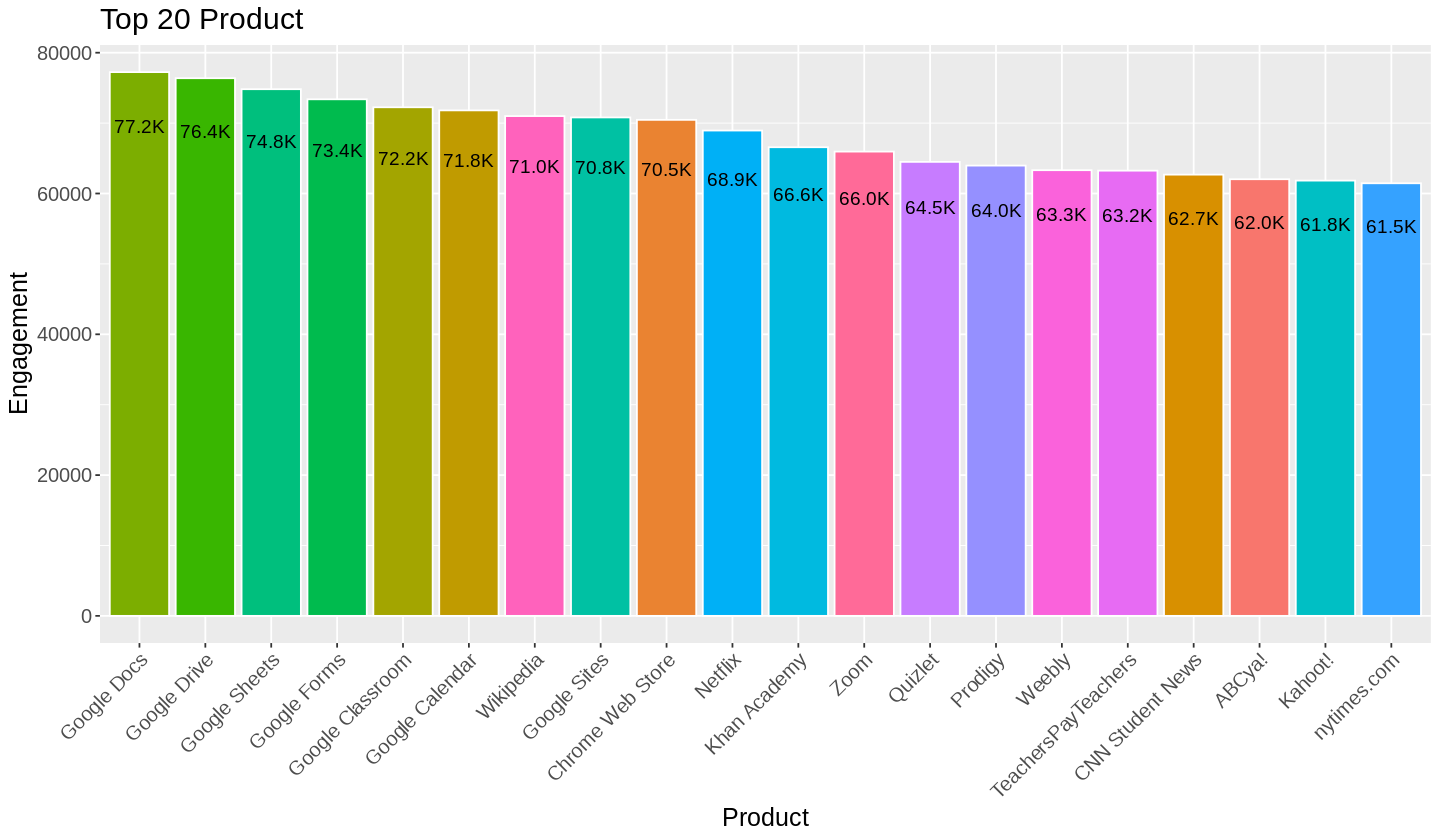

In [ ]:
fig(12, 7)
ggplot(data=ep_top20, aes(x=reorder(product_name, -cnt_id), y=cnt_id, fill=product_name)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(cnt_id/1000), 1), nsmall=1, big.mark=","),"K")), 
            position=position_stack(vjust=0.9), size=4) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Top 20 Product") +
  xlab("Product") +
  ylab("Engagement") +
  theme(legend.position = "none", text = element_text(size=15))

From the given table and plot we can clearly see that the Google products are totally dominating the top 20 products with Google docs, drive and Sheets being the most used and 8 out of top 20 products belonging to google.

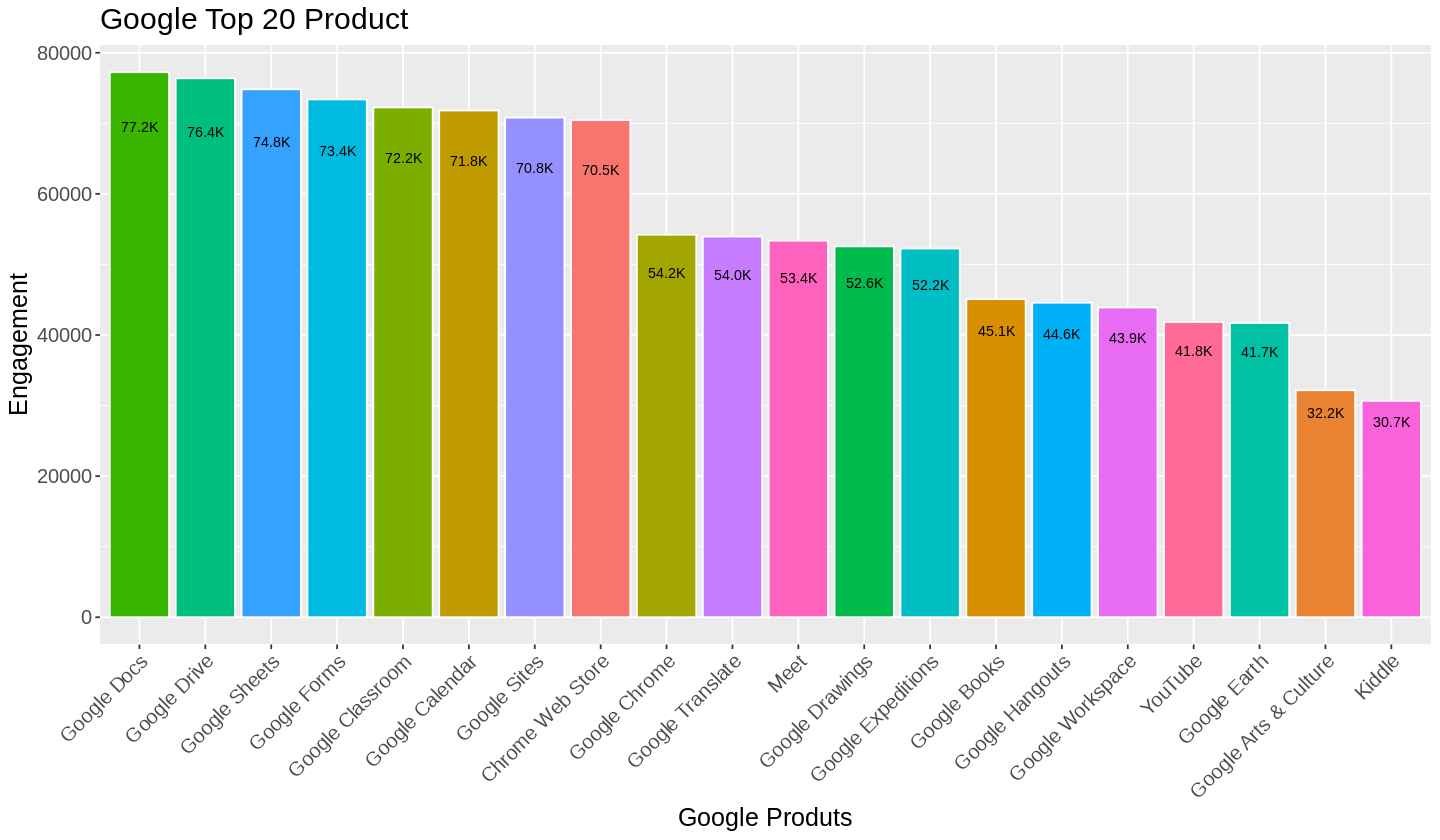

In [ ]:
google_product <- ep_data %>% filter(provider_company_name==c("Google LLC")) %>% 
    select(lp_id, provider_company_name, product_name, cnt_id) %>% arrange(-cnt_id) %>% head(20)
ggplot(data=google_product, aes(x=reorder(product_name, -cnt_id), y=cnt_id, fill=product_name)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(cnt_id/1000), 1), nsmall=1, big.mark=","),"K")), 
            position=position_stack(vjust=0.9), size=3) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Google Top 20 Product") +
  xlab("Google Produts") +
  ylab("Engagement") +
  theme(legend.position = "none", text = element_text(size=15))

We can clearly observe that how popular the products by google are and due to the pandemic some products such as Google Classroom and Meets have become very popular among both Students and Adults. It is still surprising to see YouTube in at 17th position considering how popular it is.

In [ ]:
head(google_product, 20)

lp_id,provider_company_name,product_name,cnt_id
<int>,<chr>,<chr>,<int>
95731,Google LLC,Google Docs,77243
99916,Google LLC,Google Drive,76377
28504,Google LLC,Google Sheets,74817
33185,Google LLC,Google Forms,73383
32213,Google LLC,Google Classroom,72249
72758,Google LLC,Google Calendar,71808
69827,Google LLC,Google Sites,70806
69863,Google LLC,Chrome Web Store,70461
30851,Google LLC,Google Chrome,54205


In [ ]:
non_google_t20 <- ep_data %>% filter(provider_company_name != "Google LLC") %>% 
  select(lp_id, provider_company_name, product_name, cnt_id) %>% 
  arrange(desc(cnt_id)) %>% head(20)

In [ ]:
head(non_google_t20, 20)

lp_id,provider_company_name,product_name,cnt_id
<int>,<chr>,<chr>,<int>
13496,The Wikimedia Foundation,Wikipedia,70998
90153,Netflix,Netflix,68945
29322,Khan Academy,Khan Academy,66574
61945,"ZOOM VIDEO COMMUNICATIONS, INC.",Zoom,65954
98265,Quizlet,Quizlet,64493
64948,SMARTeacher Inc.,Prodigy,63965
13699,Weebly,Weebly,63311
65277,TEACHERSPAYTEACHERS,TeachersPayTeachers,63245
16633,Cable News Network,CNN Student News,62681


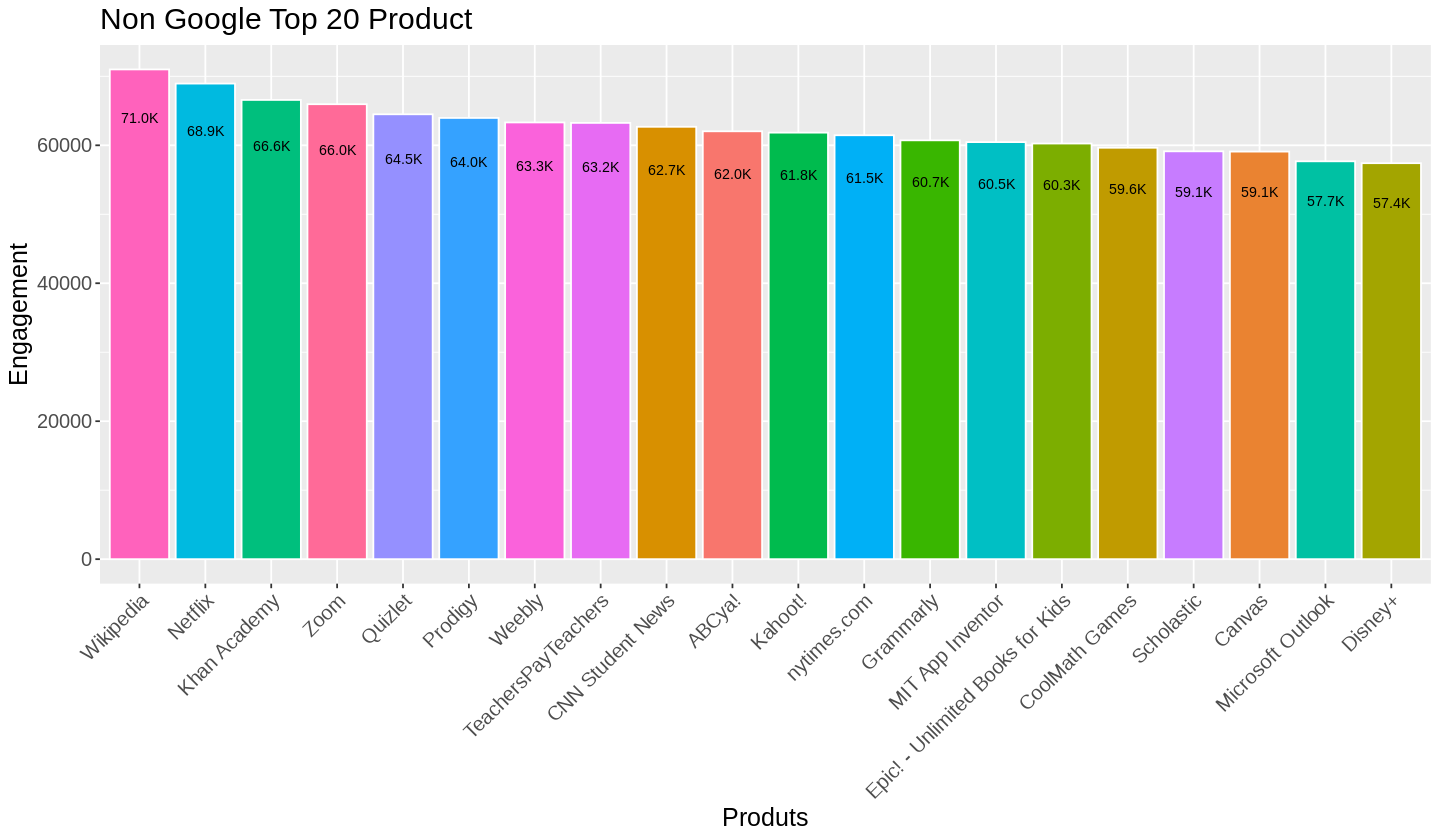

In [ ]:
ggplot(data=non_google_t20, aes(x=reorder(product_name, -cnt_id), y=cnt_id, fill=product_name)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(cnt_id/1000), 1), nsmall=1, big.mark=","),"K")), 
            position=position_stack(vjust=0.9), size=3) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Non Google Top 20 Product") +
  xlab("Produts") +
  ylab("Engagement") +
  theme(legend.position = "none", text = element_text(size=15))

After removig google products we can observe that the no. 1 spot goes to Wikipedia which comes off as no surprise followed by Netflix which has become even more immensely popular after the pandemic which are then followed by other learning based products.

### Product Essential Category

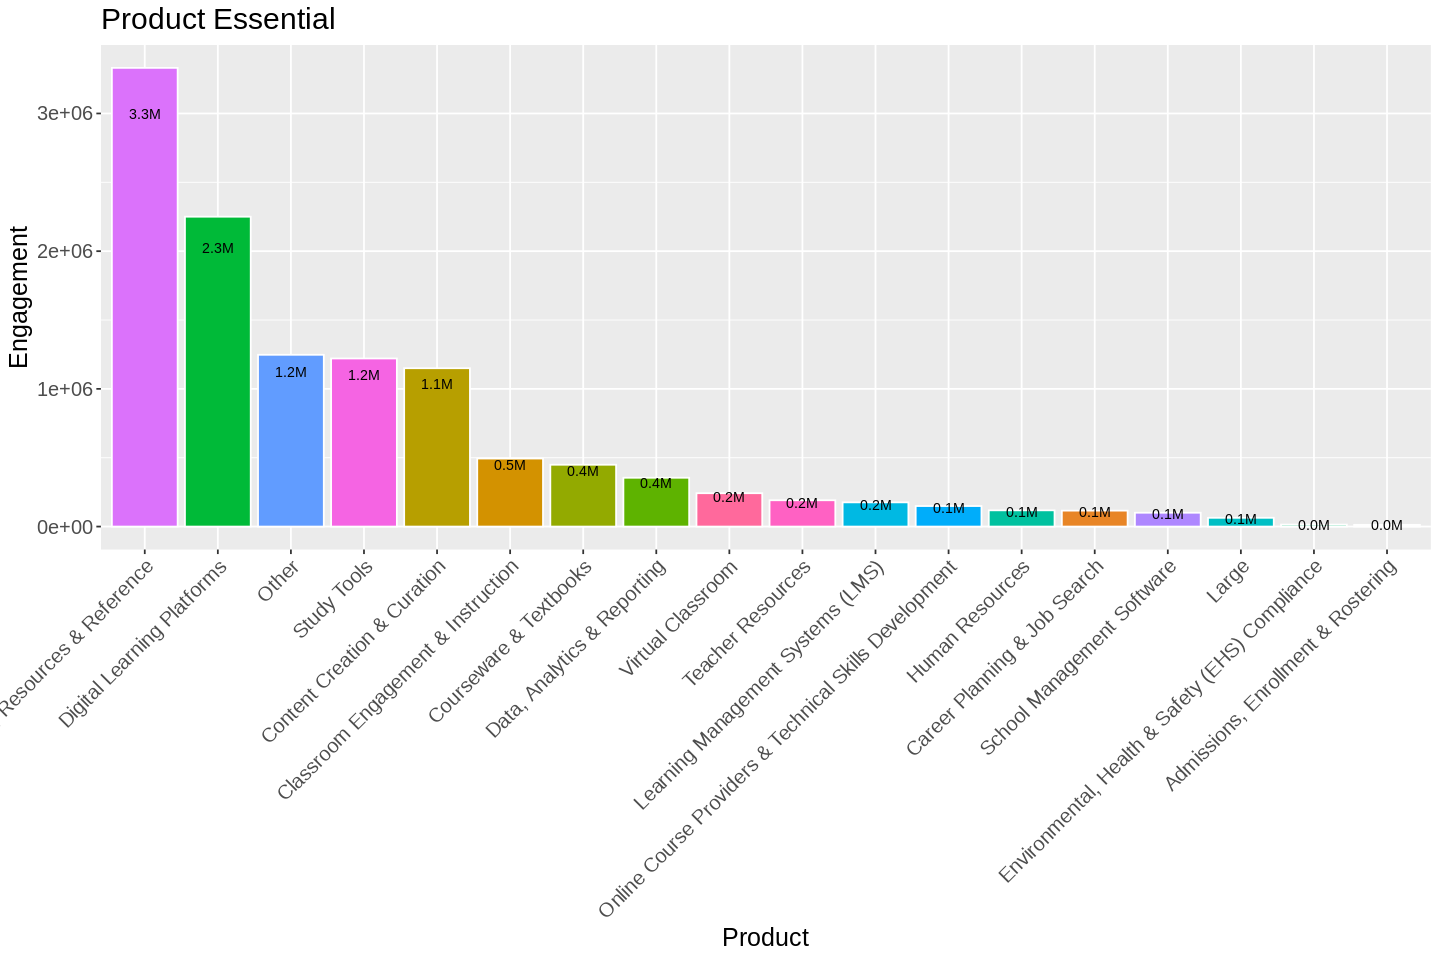

In [ ]:
fig(12, 8)
ess_data <- engagement_provider %>% filter(!is.na(essential)) %>% 
  dplyr::group_by(essential) %>% dplyr::summarise(cnt_id=n()) %>% 
  arrange(-cnt_id) 
ggplot(data=ess_data, aes(x=reorder(essential, -cnt_id), y=cnt_id, fill=essential)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(cnt_id/1000000), 1), nsmall=1, big.mark=","),"M")), 
            position=position_stack(vjust=0.9), size=3) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Product Essential") +
  xlab("Product") +
  ylab("Engagement") +  
  theme(legend.position = "none", text = element_text(size=15))

The Most Popular Category turns out to be Resource & Reference followed by Digital Learning Platforms followed by Study Tools. This actually makes a lot of sense considering that during pandemic students switched to learning through Digital Platforms hence the huge difference over other categories.

In [ ]:
head(ess_data, 20)

essential,cnt_id
<chr>,<int>
"Sites, Resources & Reference",3331114
Digital Learning Platforms,2250283
Other,1247473
Study Tools,1220716
Content Creation & Curation,1149977
Classroom Engagement & Instruction,494135
Courseware & Textbooks,449076
"Data, Analytics & Reporting",354524
Virtual Classroom,242331


We see Digital Learning Platforms on the second position with a big different in user engagements.
Below we list of 20 products in "Sites, Resources & Reference" category.

In [ ]:
ep_rar_t20 <- engagement_provider %>% filter(essential=="Sites, Resources & Reference") %>% dplyr::group_by(essential, provider_company_name, product_name) %>%
    dplyr::summarise(cnt_id=n(), na.rm=T, .groups="drop") %>% arrange(-cnt_id) %>% 
    select(product_name, provider_company_name, cnt_id) %>% head(20)
ep_rar_t20

product_name,provider_company_name,cnt_id
<chr>,<chr>,<int>
Wikipedia,The Wikimedia Foundation,70998
Netflix,Netflix,68945
Prodigy,SMARTeacher Inc.,63965
CNN Student News,Cable News Network,62681
ABCya!,"ABCya.com, LLC",62028
nytimes.com,The New York Times,61454
CoolMath Games,CoolMath.com LLC,59643
Scholastic,Scholastic Inc,59124
Disney+,Disney,57405


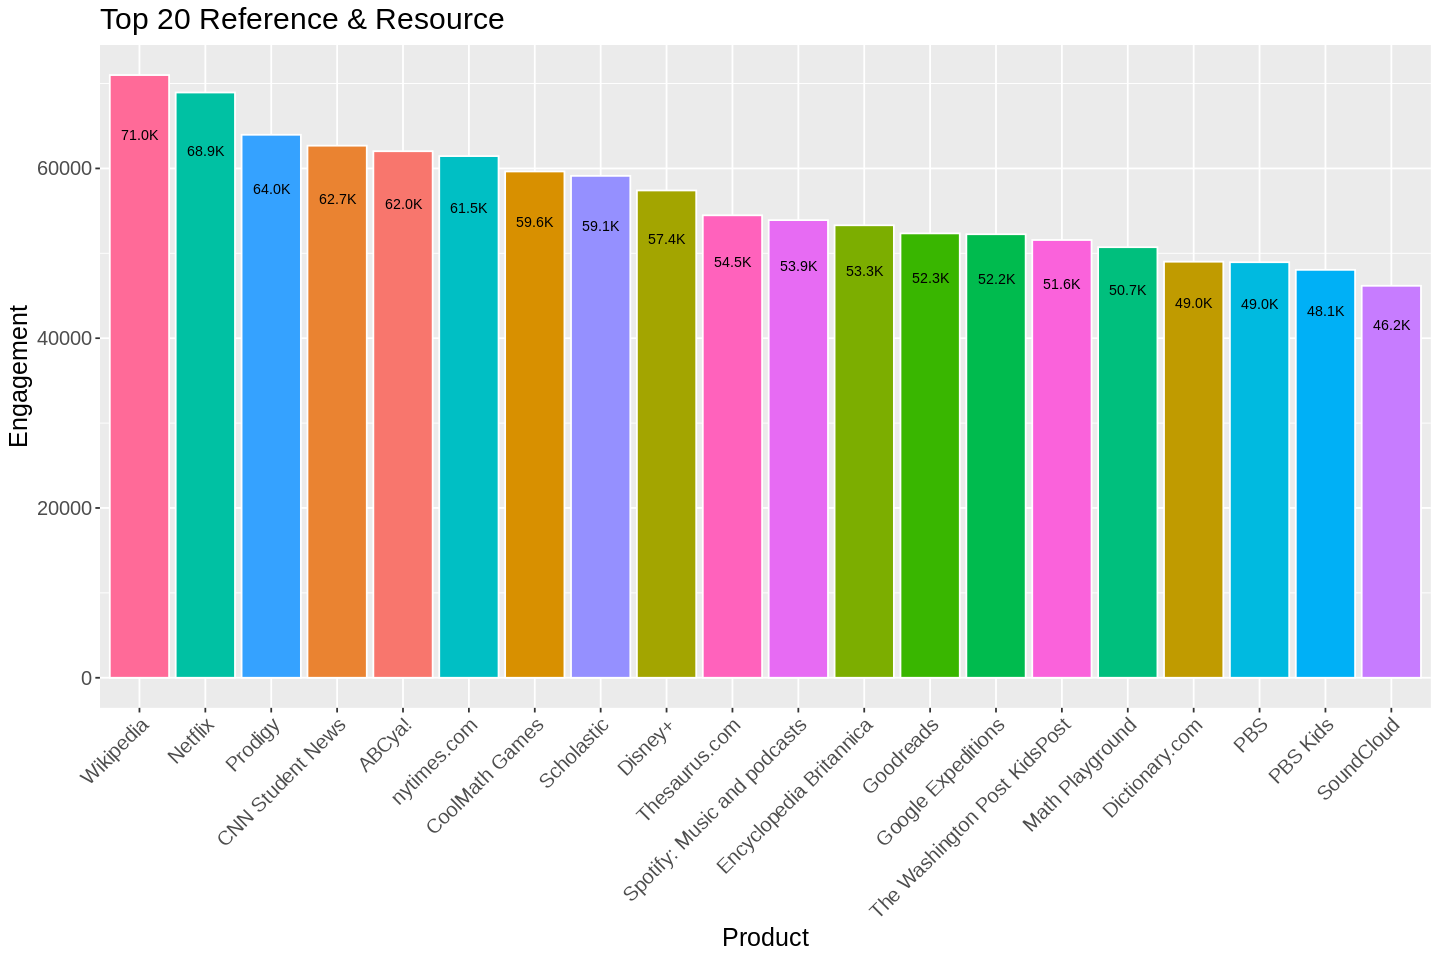

In [ ]:
ggplot(data=ep_rar_t20, aes(x=reorder(product_name, -cnt_id), y=cnt_id, fill=product_name)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(cnt_id/1000), 1), nsmall=1, big.mark=","),"K")), 
            position=position_stack(vjust=0.9), size=3) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Top 20 Reference & Resource") +
  xlab("Product") +
  ylab("Engagement") +  
  theme(legend.position = "none", text = element_text(size=15))

After observing the table we can see that the non-goolge top 2 contenders Wikipedia and Netflix both belongs to this category giving it a significant boost over other categories as well.

### Digital Learning Platform

Now we focus and explore only for Digital Learning Platform category to answer what stated in the Problem Statement of this project.

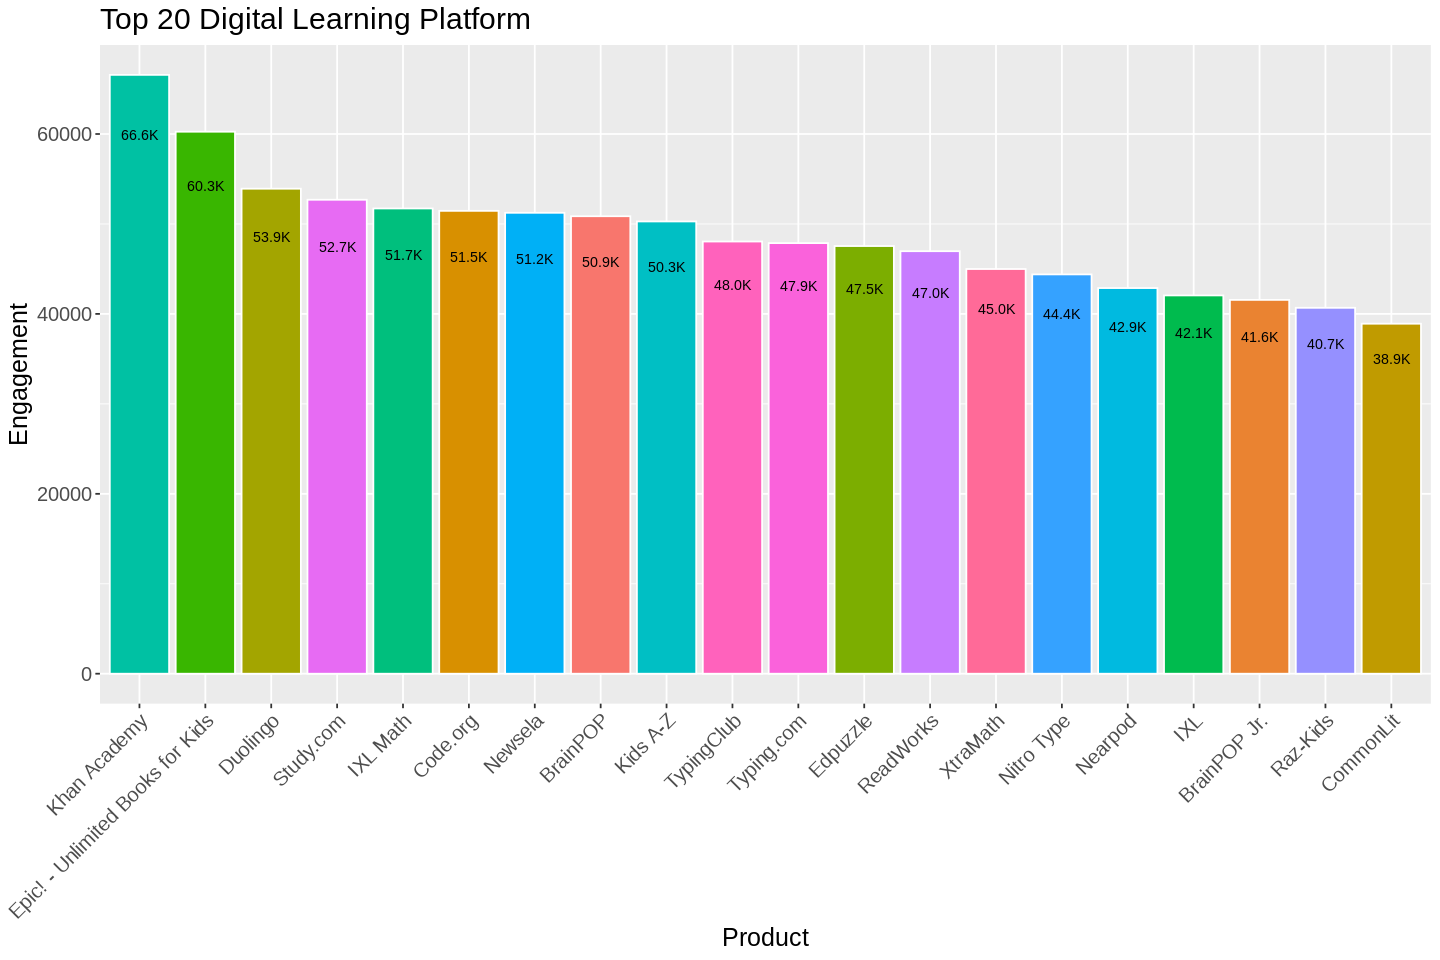

In [ ]:
fig(12, 8)
dlp_data <- engagement_provider %>% filter(essential=="Digital Learning Platforms") %>% 
  dplyr::group_by(lp_id, provider_company_name, product_name, essential) %>% 
  dplyr::summarise(cnt_id=n(), m_pa=mean(pct_access, na.rm=T), m_ei=mean(engagement_index, na.rm=T),.groups="drop") %>% 
  arrange(desc(cnt_id)) 
ep_byproduct_t20 <- dlp_data %>% select(product_name, provider_company_name, cnt_id, m_pa, m_ei) %>% 
    arrange(-cnt_id) %>% head(20)
ggplot(data=ep_byproduct_t20, aes(x=reorder(product_name, -cnt_id), y=cnt_id, fill=product_name)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(cnt_id/1000), 1), nsmall=1, big.mark=","),"K")), 
            position=position_stack(vjust=0.9), size=3) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Top 20 Digital Learning Platform") +
  xlab("Product") +
  ylab("Engagement") +  
  theme(legend.position = "none", text = element_text(size=15))

We can observe that Khan Academy is the most popular Digital Learning Platform. Some interesting Inference which can be made here is the presence of TypingClub and Typing.com, seems like more people took up learing to touch type during the pandemic period.

In [ ]:
head(ep_byproduct_t20, 20)

product_name,provider_company_name,cnt_id,m_pa,m_ei
<chr>,<chr>,<int>,<dbl>,<dbl>
Khan Academy,Khan Academy,66574,0.08637851,12.130709
Epic! - Unlimited Books for Kids,"Epic Creations, Inc.",60255,0.06969812,10.938247
Duolingo,Duolingo,53918,0.07938309,11.302164
Study.com,Study.com,52691,0.06871862,5.776192
IXL Math,IXL Learning,51722,0.06301178,8.397051
Code.org,Code.org,51457,0.07106465,9.460192
Newsela,Newsela,51241,0.05567433,8.714815
BrainPOP,BrainPOP LLC,50860,0.05756185,8.632481
Kids A-Z,Lazel Inc.,50279,0.06830428,7.513823


Khan Academy is the most populer digital learning platform, let's see user engagement in a scatter plot chart.

In [ ]:
install.packages("mnormt")
install.packages("psych")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ct_engagement <- c_engagement[c("lp_id", "pct_access", "engagement_index")]
ct_engagement <- na.omit(ct_engagement)

In [ ]:
library(corrplot)
library(RColorBrewer)

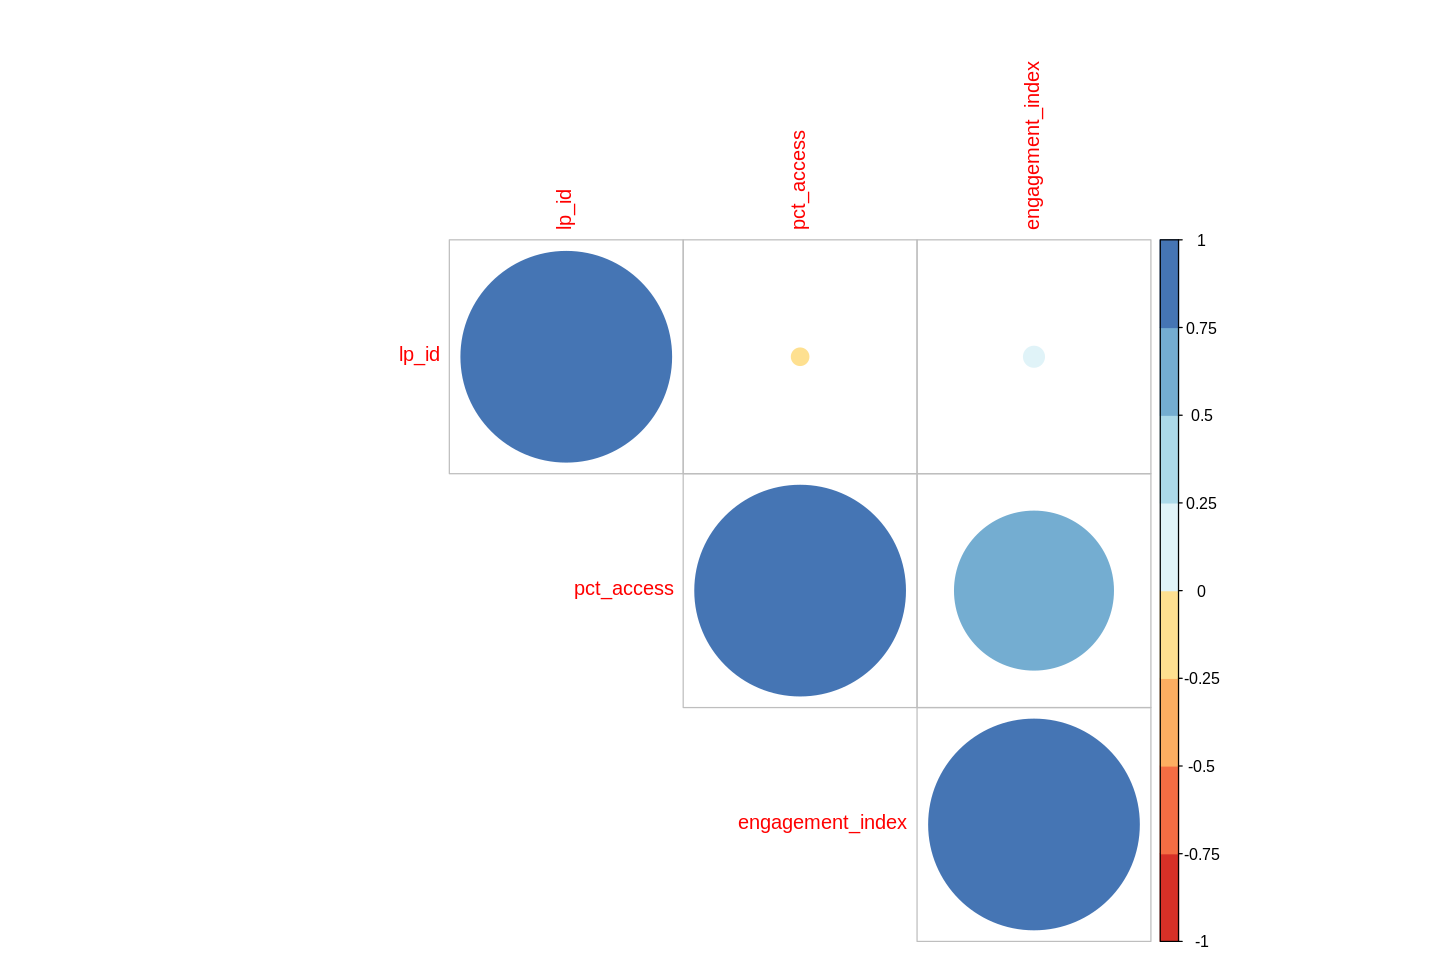

In [ ]:
M <-cor(ct_engagement)
corrplot(M, type="upper", order="hclust",
         col=brewer.pal(n=8, name="RdYlBu"))

We can observe that pct_access and engagement index are positively correlated with the correlation value of 0.5 and 0.75.

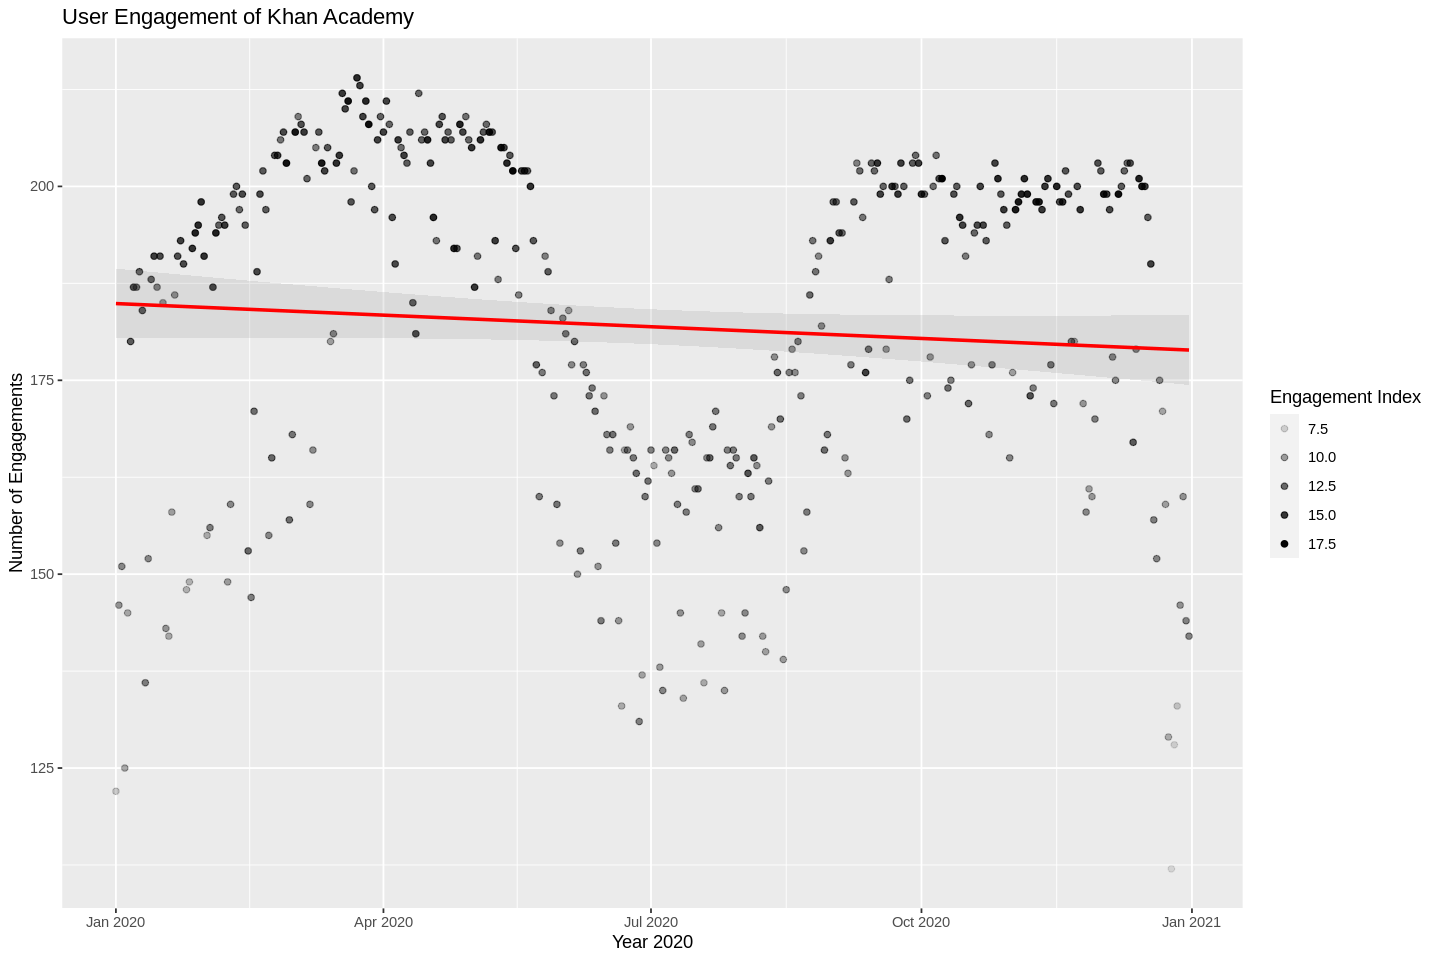

In [ ]:
fig(12, 8)
x <- subset(c_product, lp_id==29322) 
lp_idt1 <- engagement_provider %>% filter(lp_id==29322) %>% 
  dplyr::group_by(time) %>% dplyr::summarise(cnt_lp=n(), me_pa=mean(pct_access, na.rm=T), me_ei=mean(engagement_index, na.rm=T))
ggplot(data=lp_idt1, aes(x=time, y=cnt_lp, alpha=me_ei)) +
  geom_point() +
  geom_smooth(formula = y ~ x, method="lm", color="red", alpha=0.2) +
  labs(title=paste("User Engagement of", x$product_name)) +
  xlab("Year 2020") +
  ylab("Number of Engagements") +
  guides(alpha=guide_legend("Engagement Index"))

We can observer that the user engagement is high at all times but there is a huge dip in User Engagement during the Month of June - August this is because it's the month of holidays looks like pandemic hasen't affected the fact that students like to relax and stay away from school/college work during holidays.

In [ ]:
head(lp_idt1, 20)

time,cnt_lp,me_pa,me_ei
<date>,<int>,<dbl>,<dbl>
2020-01-01,122,0.06788462,7.973000
2020-01-02,146,0.06146667,10.238652
2020-01-03,151,0.06612500,10.735682
2020-01-04,125,0.07386139,9.530408
2020-01-05,145,0.06362745,9.178317
2020-01-06,180,0.08405405,13.025410
2020-01-07,187,0.08466667,14.710208
2020-01-08,187,0.12076923,12.889592
2020-01-09,189,0.12320000,13.218478


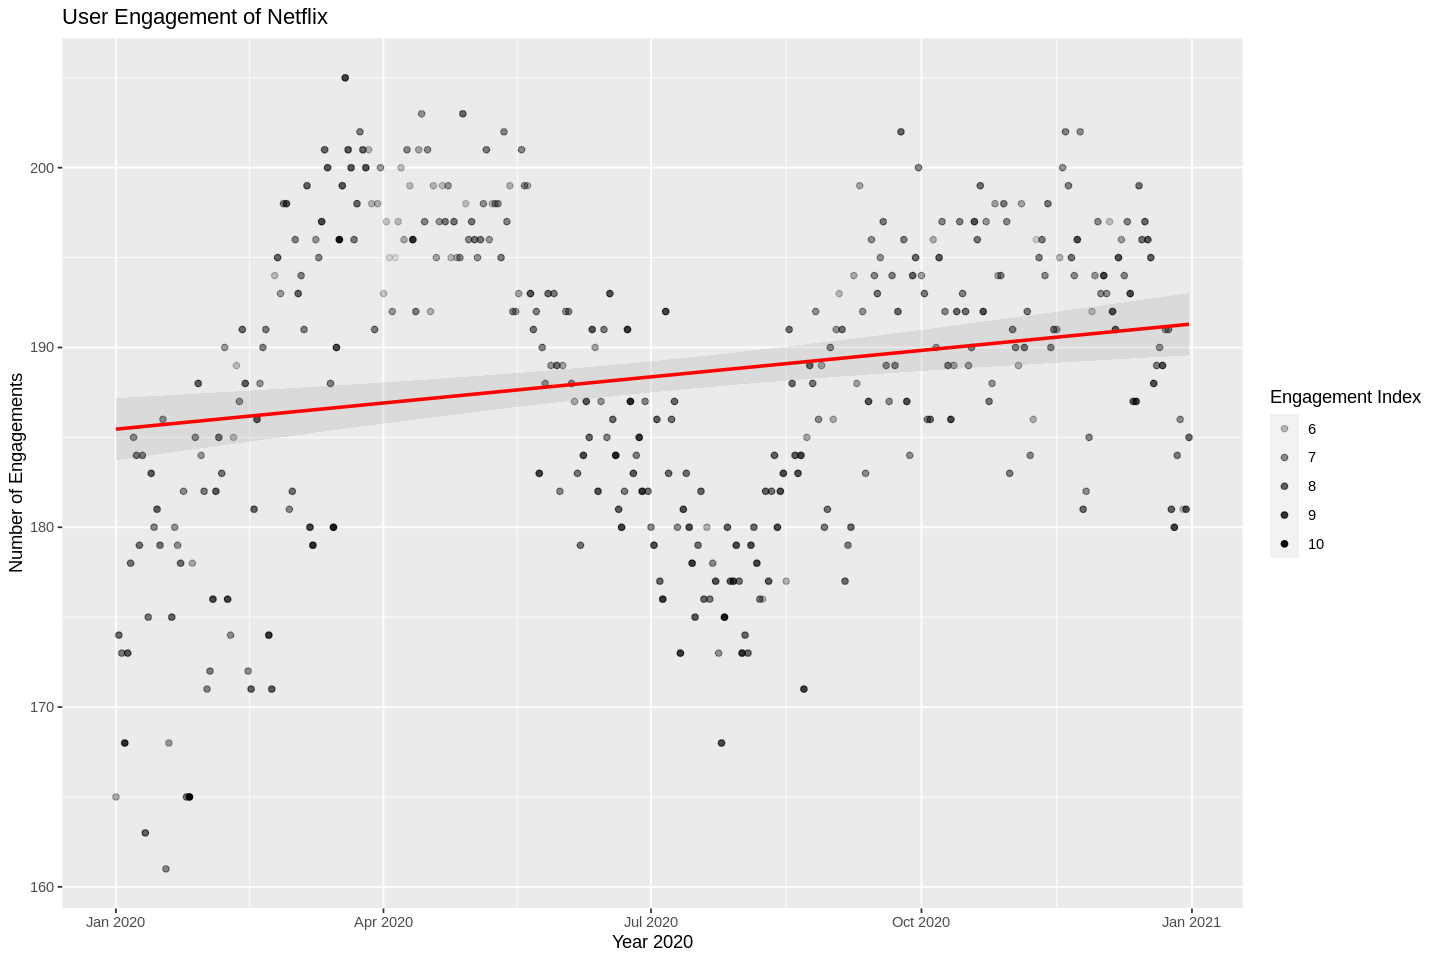

In [ ]:
x <- subset(c_product, lp_id==90153) 
lp_idt1 <- engagement_provider %>% filter(lp_id==90153) %>% 
  dplyr::group_by(time) %>% dplyr::summarise(cnt_lp=n(), me_pa=mean(pct_access, na.rm=T), me_ei=mean(engagement_index, na.rm=T))
ggplot(data=lp_idt1, aes(x=time, y=cnt_lp, alpha=me_ei)) +
  geom_point() +
  geom_smooth(formula = y ~ x, method="lm", color="red", alpha=0.2) +
  labs(title=paste("User Engagement of", x$product_name)) +
  xlab("Year 2020") +
  ylab("Number of Engagements") +
  guides(alpha=guide_legend("Engagement Index"))  

Contrary to what we thaught the trend is the same as Khan Academy with the difference being even if less people watch netflix during holidays they watch it for longer amount of time while during work days more amount of people watch but for less amount of time. We can also observe that after the pandemic hit the netflix has shown a stable overall growth more people are getting into netflix after the pandemic.

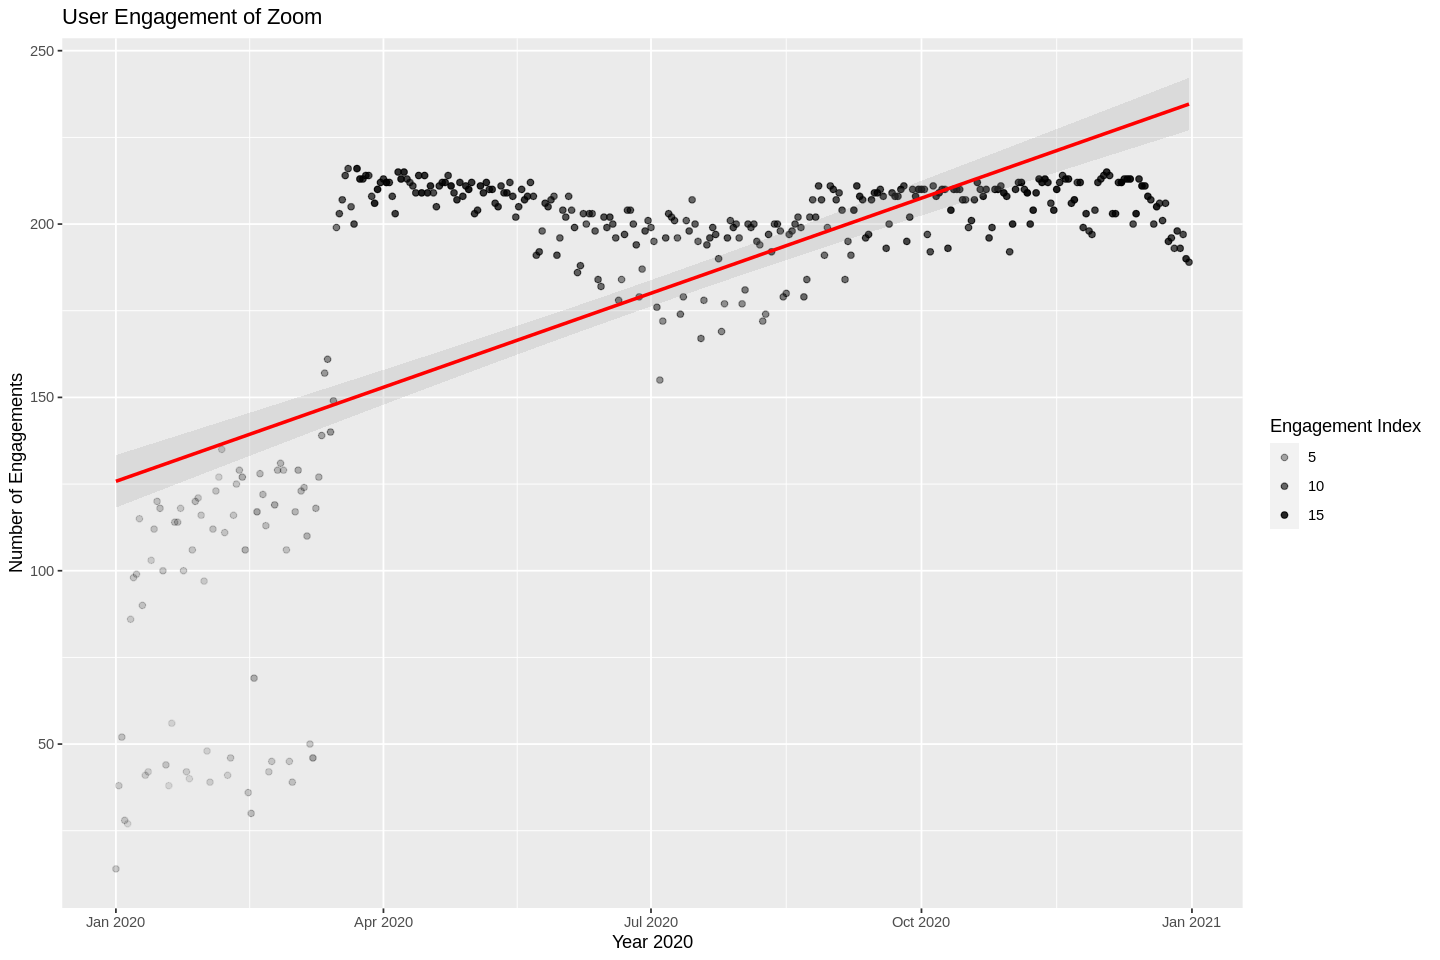

In [ ]:
x <- subset(c_product, lp_id==61945) 
lp_idt3 <- engagement_provider %>% filter(lp_id==61945) %>% 
  dplyr::group_by(time) %>% dplyr::summarise(cnt_lp=n(), me_pa=mean(pct_access, na.rm=T), me_ei=mean(engagement_index, na.rm=T))
ggplot(data=lp_idt3, aes(x=time, y=cnt_lp, alpha=me_ei)) +
  geom_point() +
  geom_smooth(formula = y ~ x, method="lm", color="red", alpha=0.2) +
  labs(title=paste("User Engagement of", x$product_name)) +
  xlab("Year 2020") +
  ylab("Number of Engagements") +
  guides(alpha=guide_legend("Engagement Index"))  

Just as we predicted we can clearly see that after the pandemic hit Zoom has blasted in popularity.

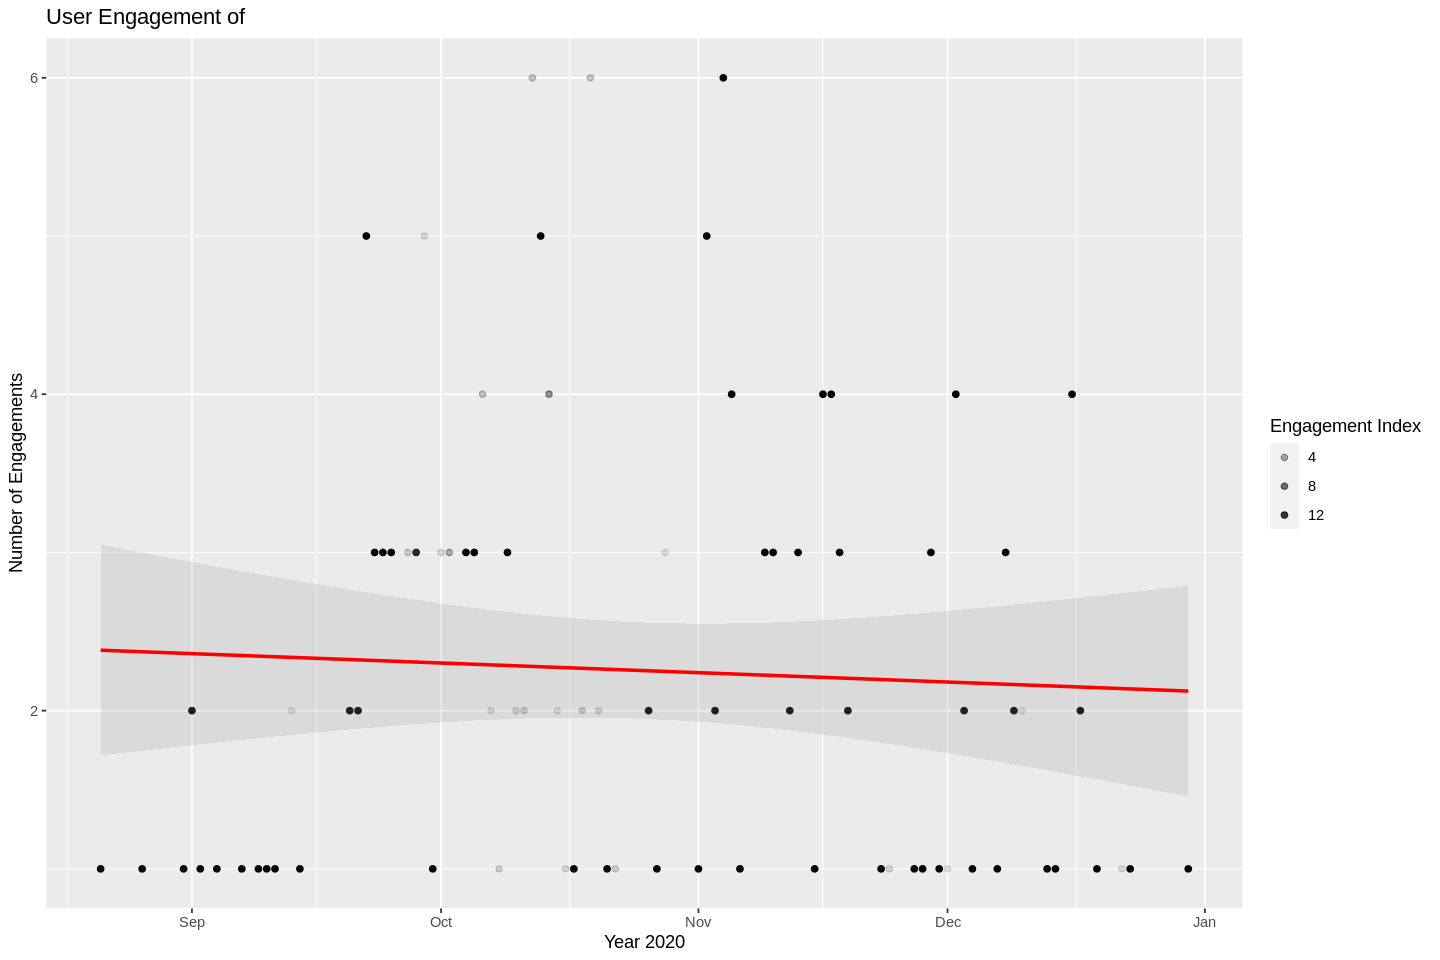

In [ ]:
x <- subset(c_product, lp_id==48049) 
lp_idt3 <- engagement_provider %>% filter(lp_id==48049) %>% 
  dplyr::group_by(time) %>% dplyr::summarise(cnt_lp=n(), me_pa=mean(pct_access, na.rm=T), me_ei=mean(engagement_index, na.rm=T))
ggplot(data=lp_idt3, aes(x=time, y=cnt_lp, alpha=me_ei)) +
  geom_point() +
  geom_smooth(formula = y ~ x, method="lm", color="red", alpha=0.2) +
  labs(title=paste("User Engagement of", x$product_name)) +
  xlab("Year 2020") +
  ylab("Number of Engagements") +
  guides(alpha=guide_legend("Engagement Index"))  

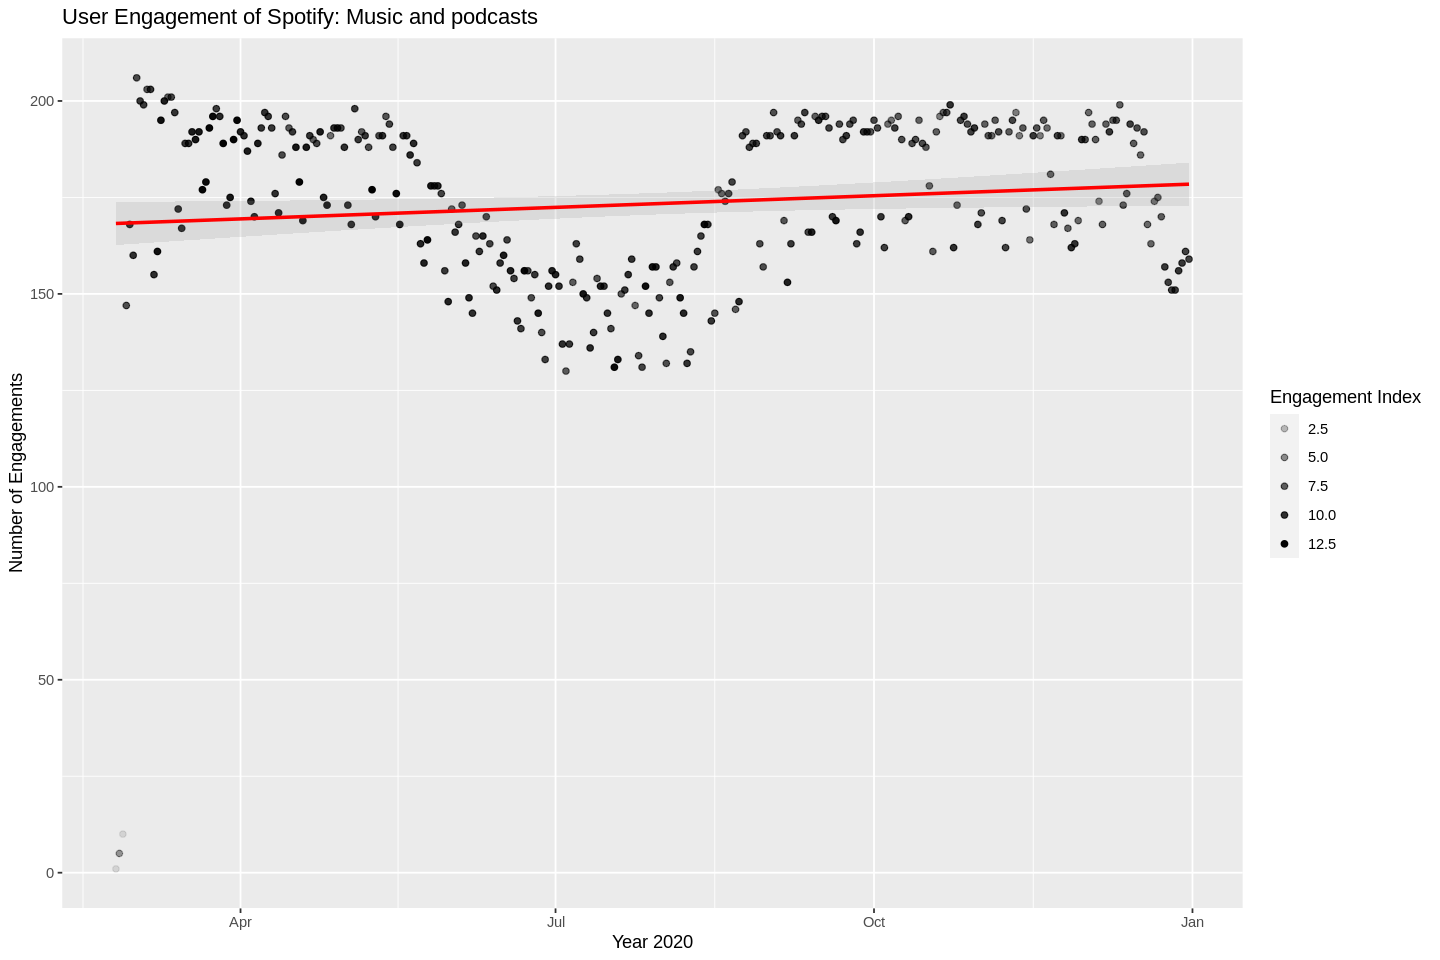

In [ ]:
x <- subset(c_product, lp_id==55450) 
lp_idt3 <- engagement_provider %>% filter(lp_id==55450) %>% 
  dplyr::group_by(time) %>% dplyr::summarise(cnt_lp=n(), me_pa=mean(pct_access, na.rm=T), me_ei=mean(engagement_index, na.rm=T))
ggplot(data=lp_idt3, aes(x=time, y=cnt_lp, alpha=me_ei)) +
  geom_point() +
  geom_smooth(formula = y ~ x, method="lm", color="red", alpha=0.2) +
  labs(title=paste("User Engagement of", x$product_name)) +
  xlab("Year 2020") +
  ylab("Number of Engagements") +
  guides(alpha=guide_legend("Engagement Index"))  

Every Season is a music season. And we still observe a dip during holidays season maybe students gets more engaged in gaming than studying wathching movies/series or listening to music.

In [ ]:
ea_data <- c_engagement %>% dplyr::group_by(lp_id, time) %>% 
  dplyr::summarise(s_cntid=n(), nm_ei=mean(engagement_index, na.rm=T), nm_pa=mean(pct_access, na.rm=T), .groups="drop")
all_engagement <- ea_data %>% filter(!is.na(nm_pa) & !is.na(nm_ei))
glimpse(all_engagement)

Rows: 914,618
Columns: 5
$ lp_id   <int> 10003, 10003, 10003, 10003, 10003, 10003, 10003, 10003, 10003,…
$ time    <date> 2020-02-12, 2020-02-18, 2020-02-24, 2020-02-26, 2020-02-27, 2…
$ s_cntid <int> 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,…
$ nm_ei   <dbl> 0.070000, 0.030000, 0.080000, 0.320000, 0.025000, 0.140000, 0.…
$ nm_pa   <dbl> 0.010, 0.000, 0.010, 0.030, 0.000, 0.010, 0.020, 0.000, 0.000,…


## Digital Learning Platforms by State
Now we visualize to analyize digital platform by state.

In [ ]:
glimpse(c_district)

Rows: 233
Columns: 11
$ district_id        <dbl> 8815, 2685, 4921, 3188, 2238, 5987, 3710, 7177, 981…
$ state              <chr> "Illinois", NA, "Utah", NA, NA, "Wisconsin", "Utah"…
$ locale             <chr> "Suburb", NA, "Suburb", NA, NA, "Suburb", "Suburb",…
$ pct_black          <dbl> 0.0, NA, 0.0, NA, NA, 0.0, 0.0, 0.2, 0.0, 0.4, 0.0,…
$ pct_hispanic       <dbl> 0.2, NA, 0.2, NA, NA, 0.2, 0.2, 0.4, 0.2, 0.6, 0.2,…
$ pct_free           <dbl> 0.0, NA, 0.2, NA, NA, 0.0, 0.4, 0.2, 0.2, 0.6, 0.0,…
$ pct_reduced        <dbl> 0.2, NA, 0.4, NA, NA, 0.2, 0.6, 0.4, 0.4, 0.8, 0.2,…
$ country_connection <dbl> 0.18, NA, 0.18, NA, NA, 0.18, 0.18, 0.18, 0.18, 0.1…
$ country_ratio      <dbl> 1, NA, 1, NA, NA, 1, 1, 1, 1, 1, NA, 1, 1, NA, NA, …
$ pp_total           <dbl> 14000, NA, 6000, NA, NA, 10000, 6000, 8000, 6000, 8…
$ pp_raw             <dbl> 16000, NA, 8000, NA, NA, 12000, 8000, 10000, 8000, …


In [ ]:
View(c_district)

district_id,state,locale,pct_black,pct_hispanic,pct_free,pct_reduced,country_connection,country_ratio,pp_total,pp_raw
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8815,Illinois,Suburb,0.0,0.2,0.0,0.2,0.18,1,14000,16000
2685,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4921,Utah,Suburb,0.0,0.2,0.2,0.4,0.18,1,6000,8000
3188,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2238,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5987,Wisconsin,Suburb,0.0,0.2,0.0,0.2,0.18,1,10000,12000
3710,Utah,Suburb,0.0,0.2,0.4,0.6,0.18,1,6000,8000
7177,North Carolina,Suburb,0.2,0.4,0.2,0.4,0.18,1,8000,10000
9812,Utah,Suburb,0.0,0.2,0.2,0.4,0.18,1,6000,8000


In [ ]:
dep_data <- engagement_provider %>% filter(!is.na(lp_id) & !is.na(product_name))
dep_product <- dep_data %>% 
  dplyr::group_by(lp_id, provider_company_name, product_name, district_id) %>% 
  dplyr::summarise(cnt_id=n(), nm_pa=mean(pct_access, na.rm=T), nm_ei=mean(engagement_index, na.rm=T), .groups="drop") %>% 
  arrange(desc(cnt_id)) %>% filter(!is.na(product_name))
dep_product <- dep_product %>% filter(!is.na(nm_pa) & !is.na(nm_ei))

In [ ]:
dep_product %>% head(20)

lp_id,provider_company_name,product_name,district_id,cnt_id,nm_pa,nm_ei
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
10533,Scholastic Inc,Scholastic,1044,366,0.09572327,6.997245
10533,Scholastic Inc,Scholastic,1558,366,0.09507576,13.160348
10533,Scholastic Inc,Scholastic,2956,366,0.06389744,4.816619
10533,Scholastic Inc,Scholastic,3222,366,0.06049296,8.666795
10533,Scholastic Inc,Scholastic,3322,366,0.10165775,16.656535
10533,Scholastic Inc,Scholastic,4051,366,0.06350254,6.934876
10533,Scholastic Inc,Scholastic,6131,366,0.10112069,13.791047
10533,Scholastic Inc,Scholastic,8256,366,0.04893939,5.863655
11585,Houghton Mifflin Harcourt,Think Central,9043,366,0.08556962,9.416949


In [ ]:
nwea_data <- dep_product %>% dplyr::group_by(district_id) %>% dplyr::summarise(cnt_id=sum(cnt_id, na.rm=T), m_pa=mean(nm_pa, na.rm=T), m_ei=mean(nm_ei, na.rm=T))
d_ep <- dep_product %>% left_join(c_district, by="district_id")

In [ ]:
sd_ep <- d_ep %>% dplyr::group_by(state) %>% 
  dplyr::summarise(s_id=sum(cnt_id), m_pa=mean(nm_pa, na.rm=T), m_ei=mean(nm_ei, na.rm=T), 
                   m_pb = mean(pct_black, na.rm=F), m_ph = mean(pct_hispanic, na.rm=F),
                   m_pf=mean(pct_free, na.rm=T), m_red=mean(pct_reduced, na.rm=T), m_cc=mean(country_connection, na.rm=T),
                   m_pt=median(pp_total, na.rm=T)) %>% 
  filter(state!="NaN") %>% 
  arrange(desc(s_id))

In [ ]:
tmp_se <- sd_ep %>% filter(m_pb+m_ph<1)
tmp_black <- tmp_se %>% 
    mutate(state=state, race="Black", pct_race=m_pb) %>% 
    select(state, race, pct_race)
tmp_hisp <- tmp_se %>% 
    mutate(state=state, race="Hispanic", pct_race=m_ph) %>% 
    select(state, race, pct_race)
race_ep <- rbind(tmp_black, tmp_hisp)

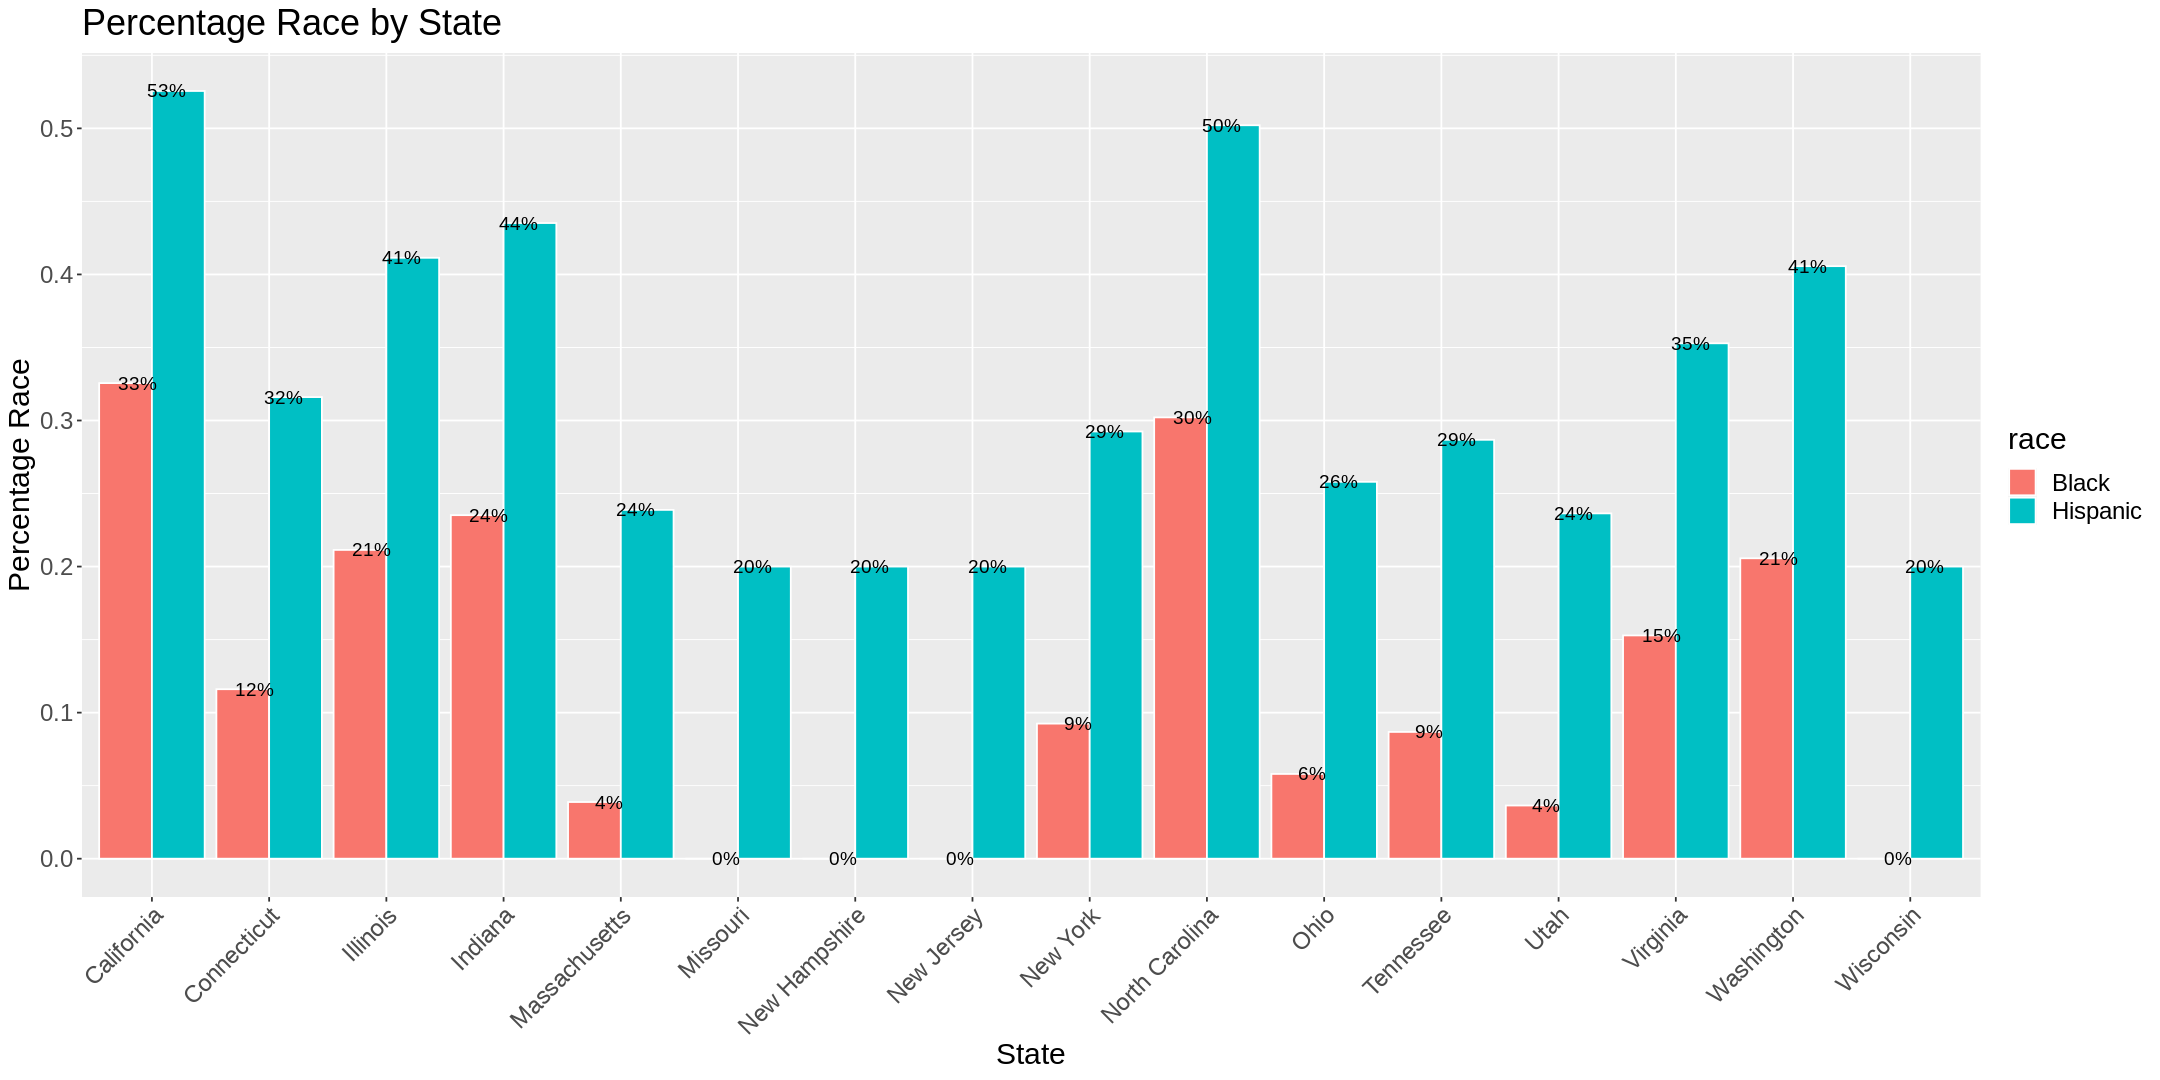

In [ ]:
fig(18, 9)
race_ep %>% 
  ggplot(., aes(state, pct_race, fill=race), color=race) +
  geom_bar(stat = "identity", position = 'dodge', width=0.9, color="white") +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  geom_text(aes(label=paste0( format(round(pct_race*100, 0)), "%")), position=position_dodge(0.5), size=4) +
  guides(color=guide_legend("Race")) +
  labs(title="Percentage Race by State") +
  xlab("State") +
  ylab("Percentage Race") +
  theme(text = element_text(size=18))

In all of the states the percentage of hispanic students are always higher than the number of black students.

### Percentage Free

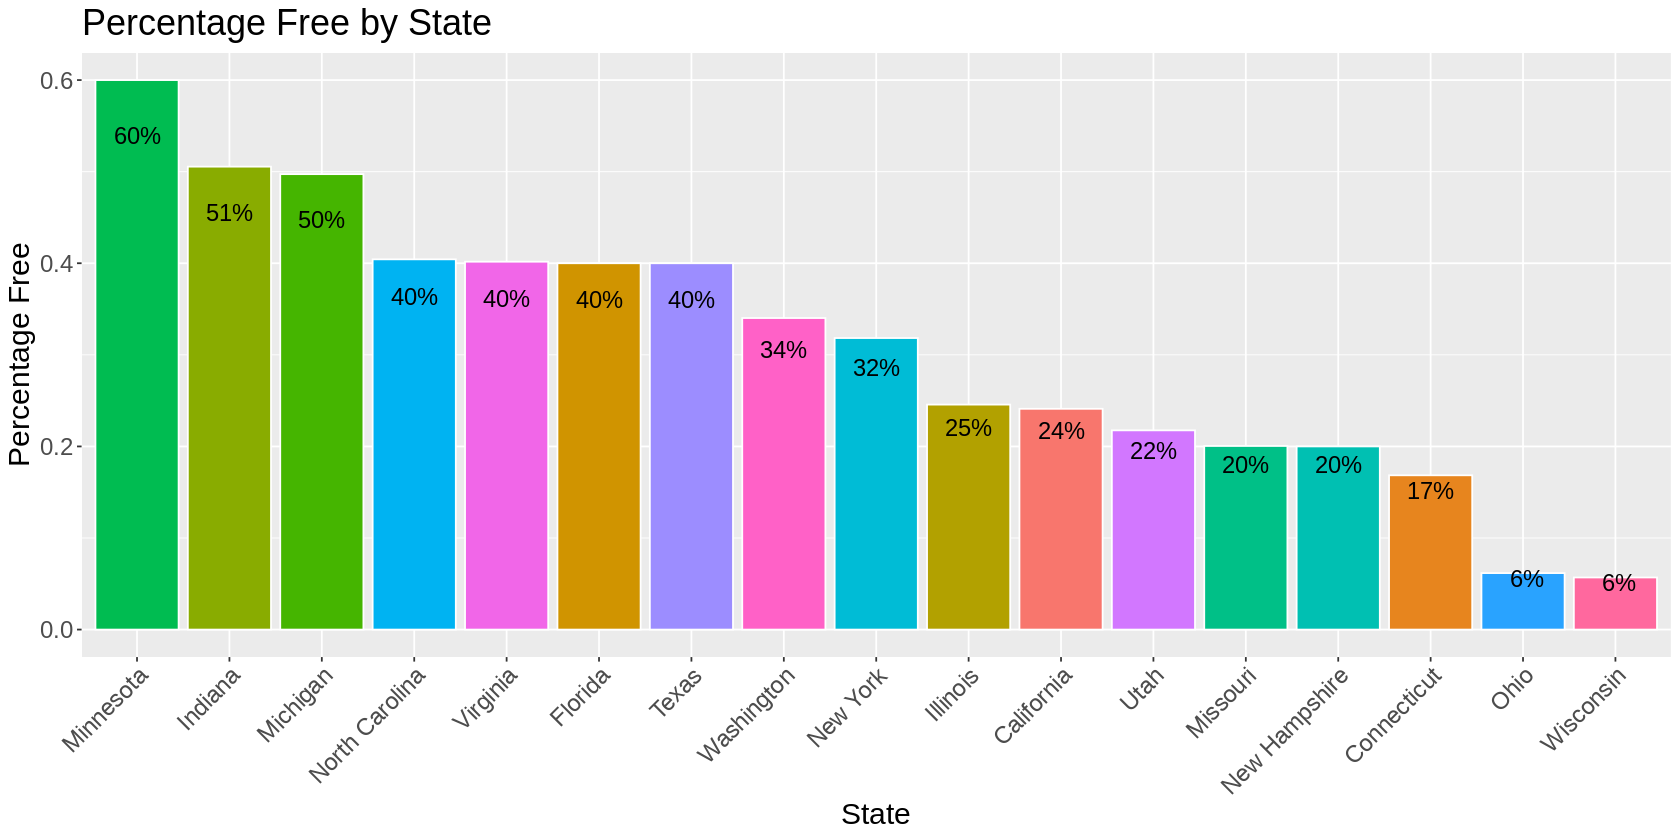

In [ ]:
fig(14, 7)
sd_ep %>% filter(m_pf>0) %>%
ggplot(data=., aes(x=reorder(state, -m_pf), y=m_pf, fill=state)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0( format(round(m_pf*100, 0)), "%")), position=position_stack(vjust=0.9), size=5) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Percentage Free by State") +
  xlab("State") +
  ylab("Percentage Free") +
  theme(legend.position = "none", text = element_text(size=18))

In Minnesota the percentage of student who get free lunch is the highest followed by Indiana leading by just 11% from Michigan.

### Total Expenditure Per-pupil by State

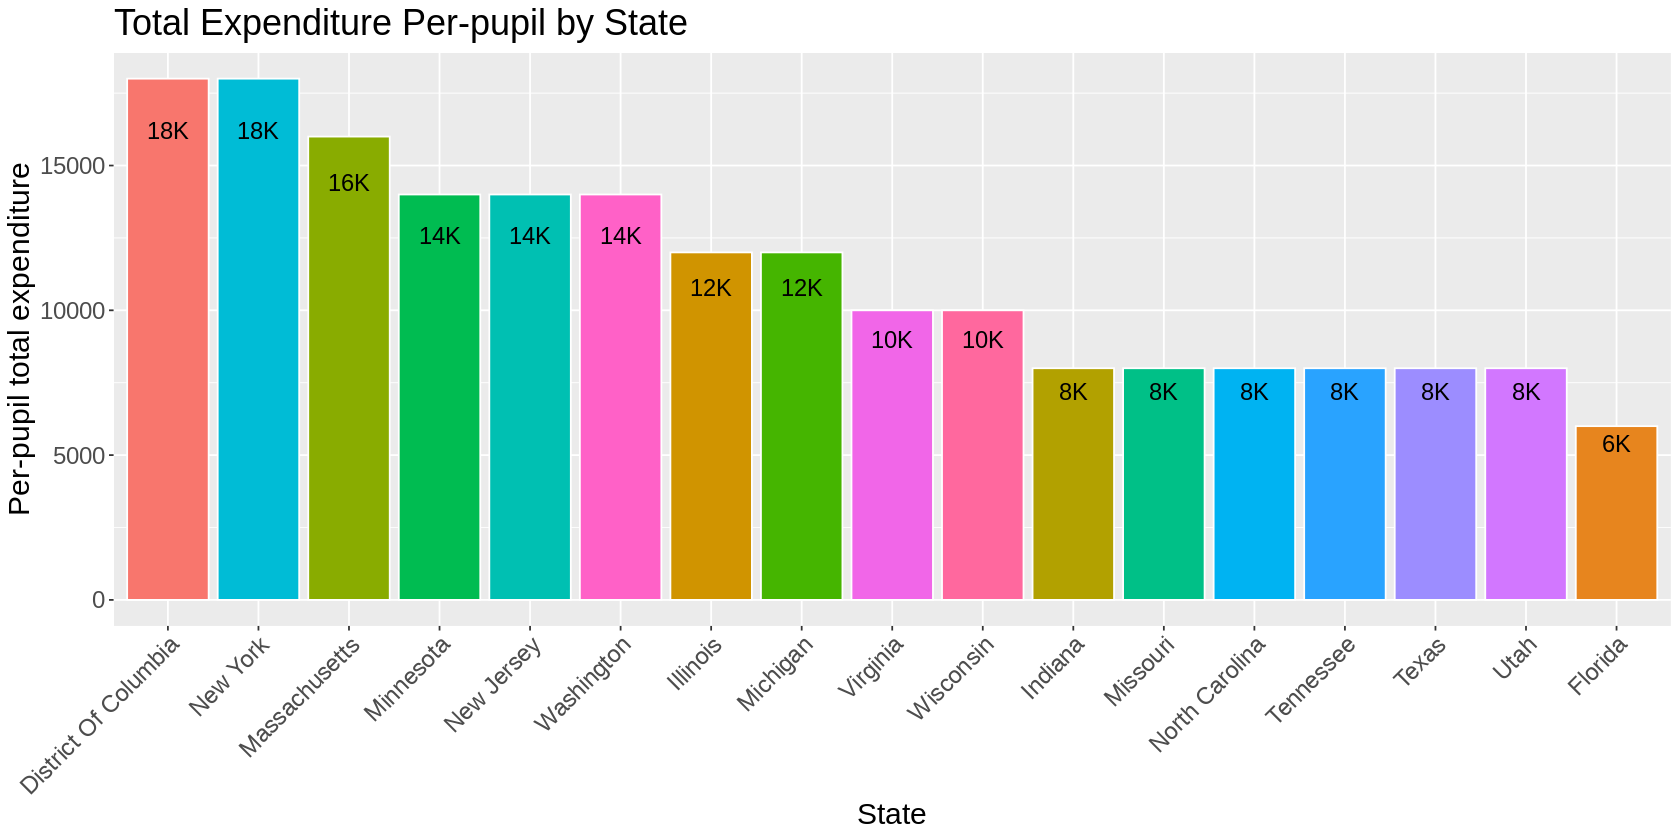

In [ ]:
fig(14, 7)
sd_ep %>% filter(m_pt>0) %>%
ggplot(data=., aes(x=reorder(state, -m_pt), y=m_pt, fill=state)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label= paste0(format(round(m_pt/1000, 2), 1),"K")), position=position_stack(vjust=0.9), size=5) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Total Expenditure Per-pupil by State") +
  xlab("State") +
  ylab("Per-pupil total expenditure") +
  theme(legend.position = "none", text = element_text(size=18))

In The district of Columbia and New York people pay the highest expenditure followed by Massachusetts.

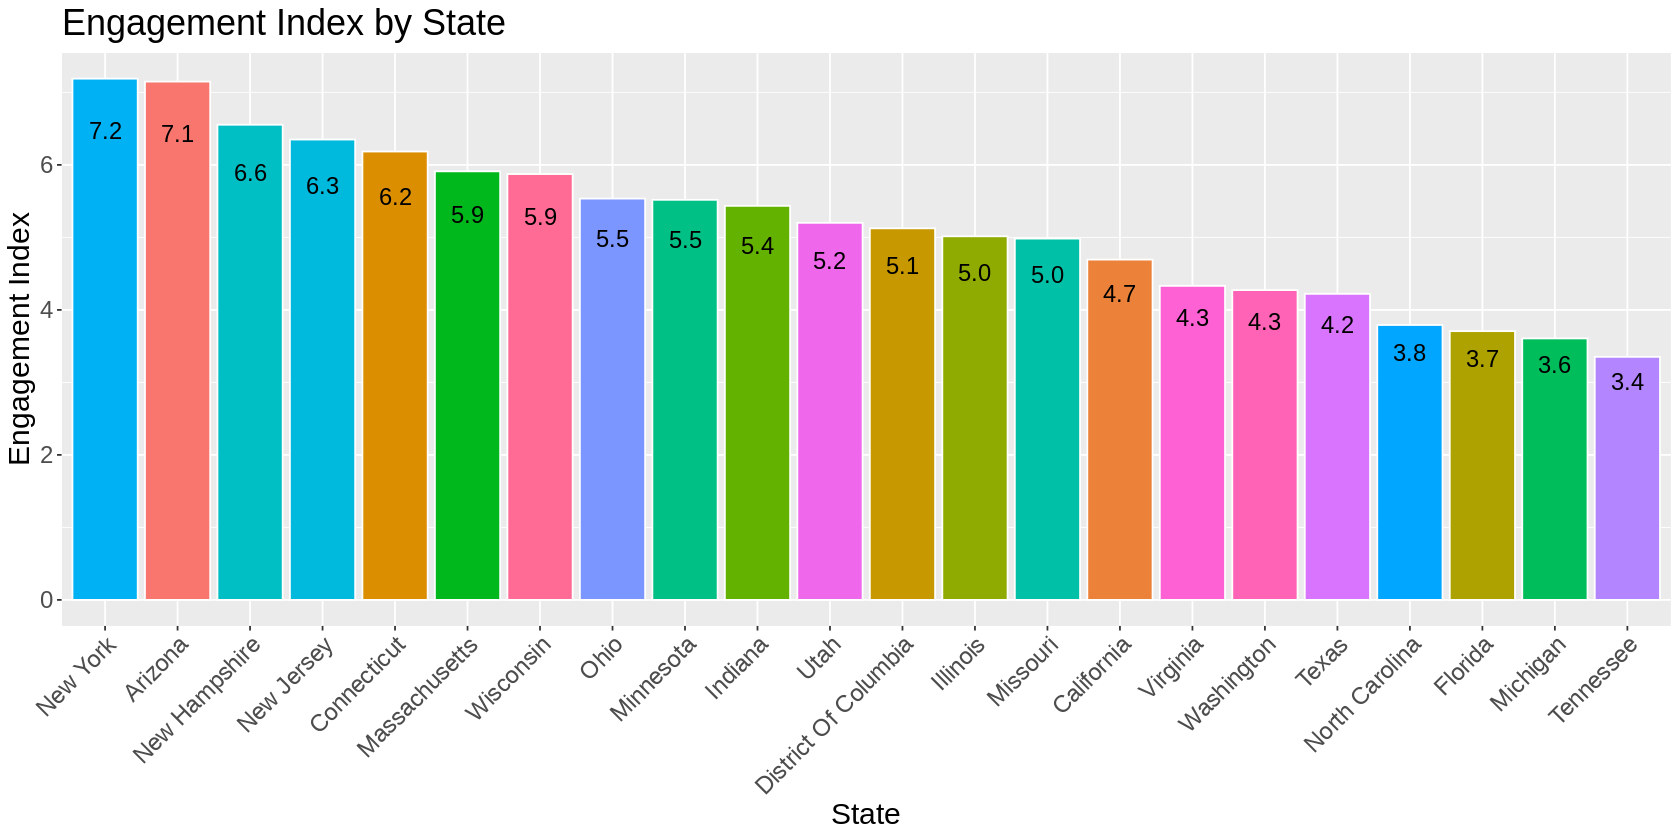

In [ ]:
fig(14, 7)
sd_ep %>% 
ggplot(data=., aes(x=reorder(state, -m_ei), y=m_ei, fill=state)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=format(round(as.numeric(m_ei), 1), nsmall=1, big.mark=",")), 
            position=position_stack(vjust=0.9), size=5) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Engagement Index by State") +
  xlab("State") +
  ylab("Engagement Index") +
  theme(legend.position = "none", text = element_text(size=18))

The state in which students show the highest amouunt of engagement is New York which is very closely followed by Arizona then New Hamsphire

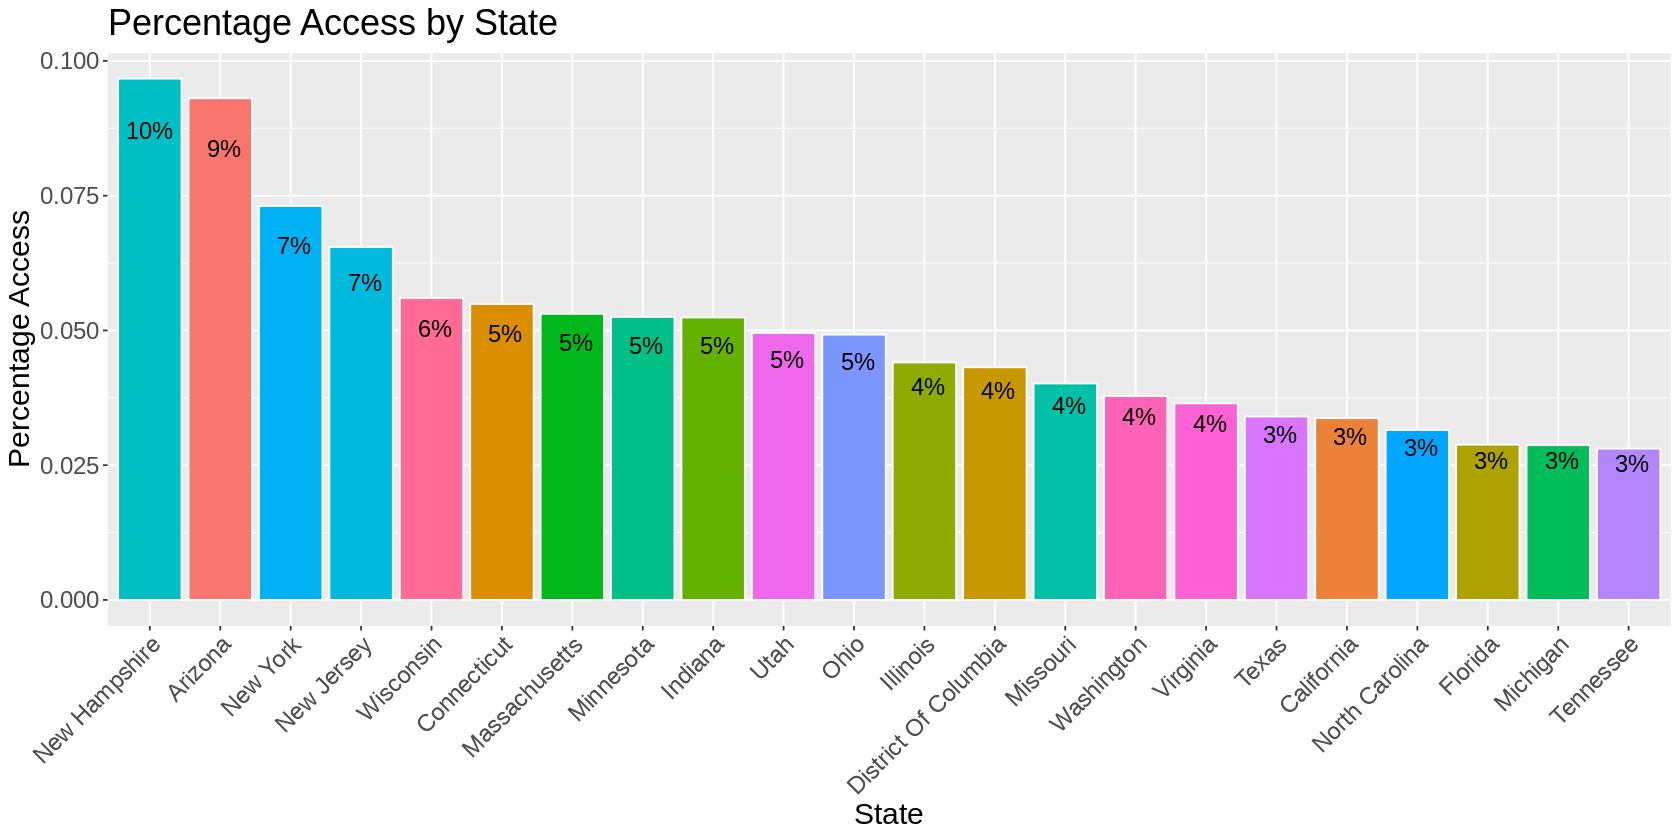

In [ ]:
fig(14, 7)
sd_ep %>% 
ggplot(data=., aes(x=reorder(state, -m_pa), y=m_pa, fill=state)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0( format(round(m_pa*100, 0)), "%")), position=position_stack(vjust=0.9), size=5) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="Percentage Access by State") +
  xlab("State") +
  ylab("Percentage Access") +
  theme(legend.position = "none", text = element_text(size=18))

New Hampshire followed by Arizona and New York has the highest percentage of students in the district that have at least one page-load event on a given day. This shows similar pattern to that of the engagement index.

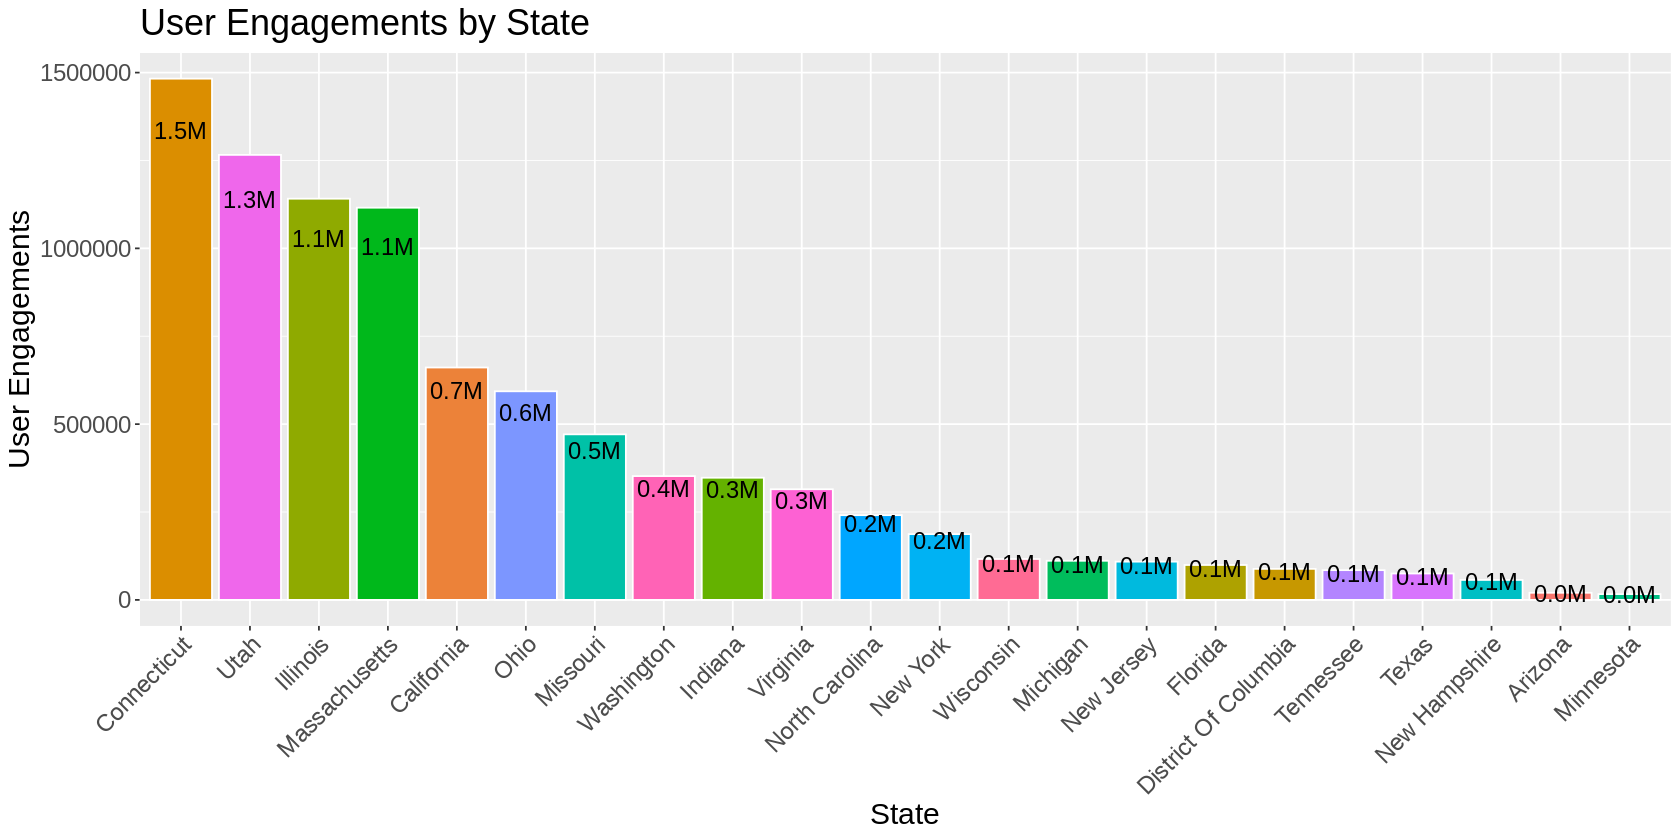

In [ ]:
fig(14, 7)
sd_ep %>% 
ggplot(data=., aes(x=reorder(state, -s_id), y=s_id, fill=state)) +
  geom_bar(stat="identity", width=0.9, color="white") +
  geom_text(aes(label=paste0(format(round(as.numeric(s_id/1000000), 1), nsmall=1, big.mark=","), "M")), 
            position=position_stack(vjust=0.9), size=5) +
  scale_x_discrete(guide = guide_axis(angle=45)) +
  labs(title="User Engagements by State") +
  xlab("State") +
  ylab("User Engagements") +
  theme(legend.position = "none", text = element_text(size=18))

Connecticut has the highest amount of User Engagements followed by Utah and illinos while Onio and others below it are having <= 0.5M user engagement

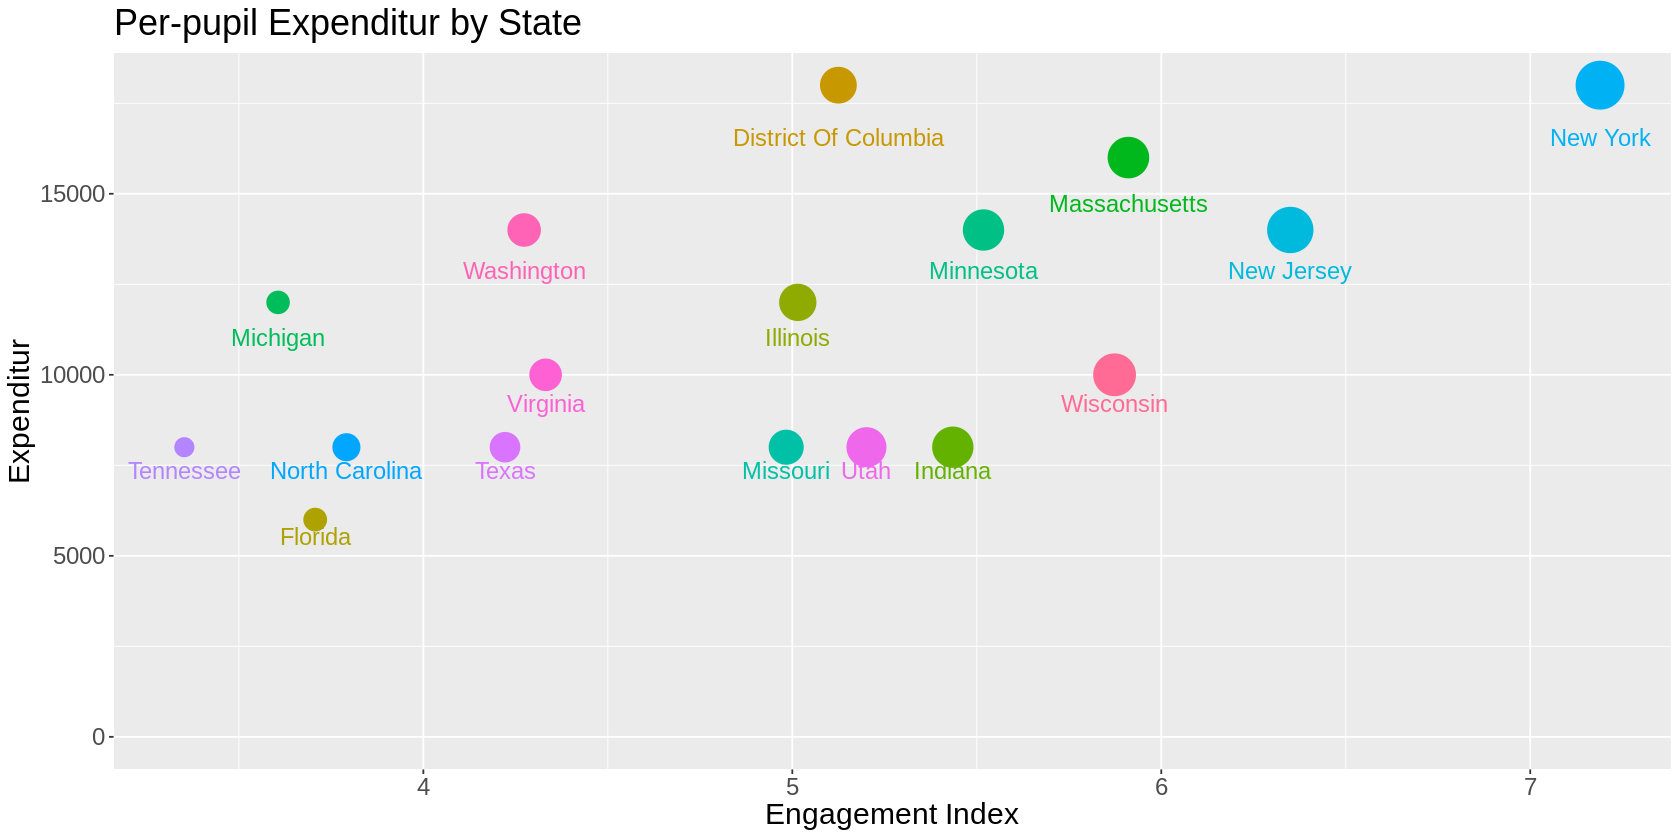

In [ ]:
fig(14, 7)
sd_ep %>%
ggplot(., aes(x=m_ei, y=m_pt, size=m_pa, color=state)) +
  geom_point() +
  geom_text(aes(label=state), position=position_stack(vjust=.92), size=5) +
  labs(title="Per-pupil Expenditur by State") +
  xlab("Engagement Index") +
  ylab("Expenditur") +
  guides(color=guide_legend("State")) +
  guides(size=guide_legend("Engagement Index")) +
  scale_size_continuous(range = c(5, 15)) +
  theme(legend.position = "none", text = element_text(size=18))

With the help of scatterplot we can clearly observe that New York is a state which has both higher Engagement Index as well as high Expenditure. While florida has both low Engagement Index and low Expenditure. While the gold zone in the middle is where most state lies with balanced expenditure and engagement index.

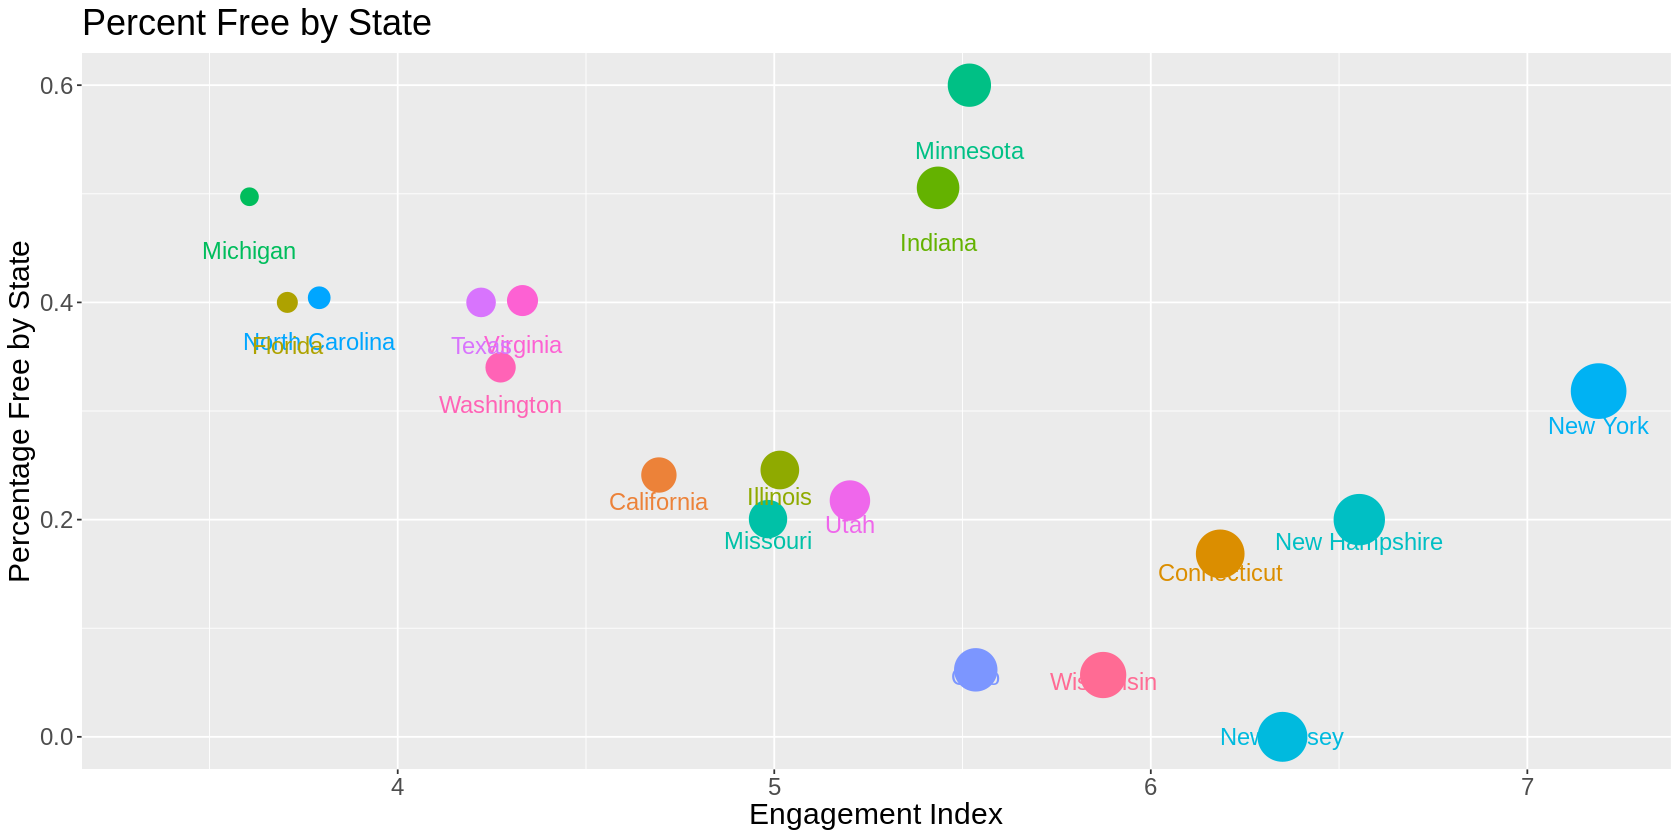

In [ ]:
fig(14, 7)
sd_ep %>%
ggplot(., aes(x=m_ei, y=m_pf, size=m_ei, color=state)) +
  geom_point() +
  geom_text(aes(label=state), position=position_stack(vjust=.9), size=5) +
  labs(title="Percent Free by State") +
  xlab("Engagement Index") +
  ylab("Percentage Free by State") +
  guides(color=guide_legend("State")) +
  guides(size=guide_legend("Engagement Index")) +
  scale_size_continuous(range = c(1, 15)) +
  theme(legend.position = "none", text = element_text(size=18))

Minesota has the highest percentage of free luch provvided while it's engagement index is of 5.5. Except a few state we notice a trend that usually the higher the Engagement Index lower is the Percentage of free lunch.

### Engagement vs Features

In [ ]:
# district
d_data <- c_engagement %>% 
    dplyr::group_by(district_id) %>%
    dplyr::summarise(cnt_id=n(), m_pa=mean(pct_access, na.rm=T), m_ei=mean(engagement_index, na.rm=T))

In [ ]:
d_state <- d_data %>% 
    filter(!is.na(m_ei) & !is.na(m_pa)) %>%
    left_join(c_district, by="district_id")

glimpse(d_state)

Rows: 232
Columns: 14
$ district_id        <dbl> 1000, 1039, 1044, 1052, 1131, 1142, 1179, 1204, 127…
$ cnt_id             <int> 104003, 38790, 255722, 91977, 32963, 28290, 98170, …
$ m_pa               <dbl> 0.03185485, 0.10235019, 0.02153032, 0.03898936, 0.0…
$ m_ei               <dbl> 5.373897, 6.834909, 2.894234, 5.313663, 5.195331, 1…
$ state              <chr> "Connecticut", NA, "Missouri", "Illinois", NA, "Con…
$ locale             <chr> "Suburb", NA, "Suburb", "Suburb", NA, "Rural", NA, …
$ pct_black          <dbl> 0.6, NA, 0.0, 0.2, NA, 0.0, NA, 0.0, 0.0, 0.0, 0.0,…
$ pct_hispanic       <dbl> 0.8, NA, 0.2, 0.4, NA, 0.2, NA, 0.2, 0.2, 0.2, 0.2,…
$ pct_free           <dbl> 0.2, NA, 0.0, 0.2, NA, 0.2, NA, 0.0, 0.4, 0.4, 0.4,…
$ pct_reduced        <dbl> 0.4, NA, 0.2, 0.4, NA, 0.4, NA, 0.2, 0.6, 0.6, 0.6,…
$ country_connection <dbl> 0.18, NA, NA, 0.18, NA, 0.18, NA, 0.18, 0.18, 0.18,…
$ country_ratio      <dbl> 1, NA, NA, 1, NA, 1, NA, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ pp_total        

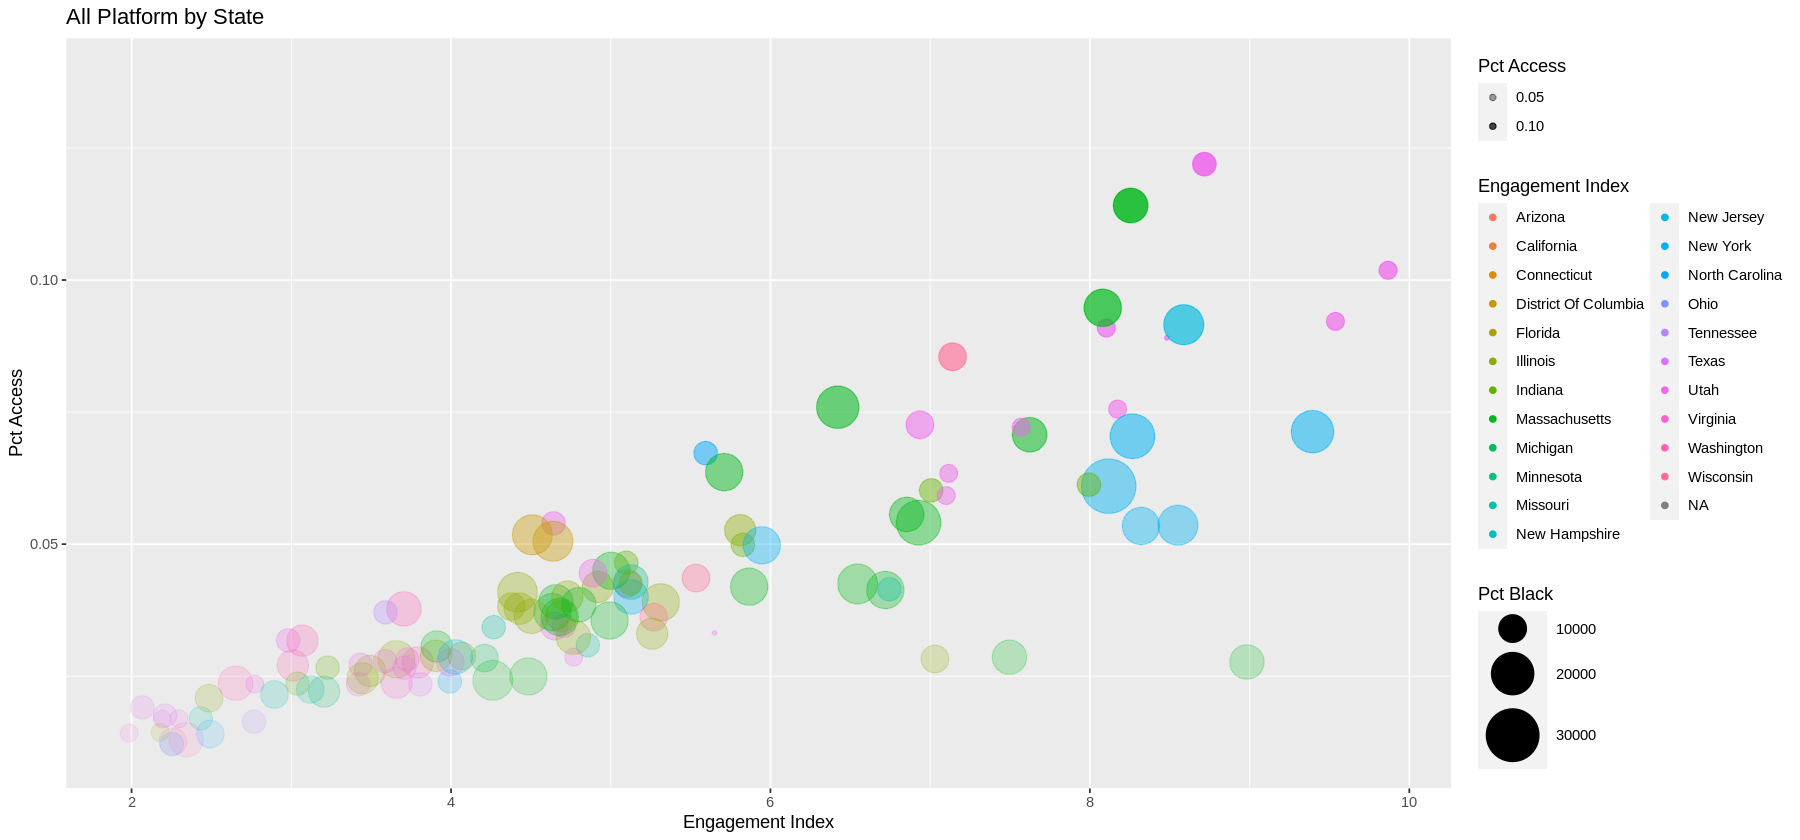

In [ ]:
fig(15, 7)
d_state %>% filter(m_pa>0) %>%
ggplot(., aes(x=m_ei, y=m_pa, size=pp_total, alpha=m_pa, color=state)) +
  geom_point() +
  labs(title="All Platform by State") +
  ylab("Pct Access") +
  xlab("Engagement Index") +
  guides(alpha=guide_legend("Pct Access")) +
  guides(size=guide_legend("Pct Black")) +
  scale_size_continuous(range = c(1, 15)) +
  guides(color=guide_legend("Engagement Index"))

The scatter plot above shows the most user engagement state is Utah, Illinois and Massachusetts respetively. Other states are below a million for California and Ohio, and the rest of states are below 500K of user engagement in the year 2020.

In [ ]:
install.packages("ggthemes")
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("mapproj")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**US Map showing Percetage access by State**

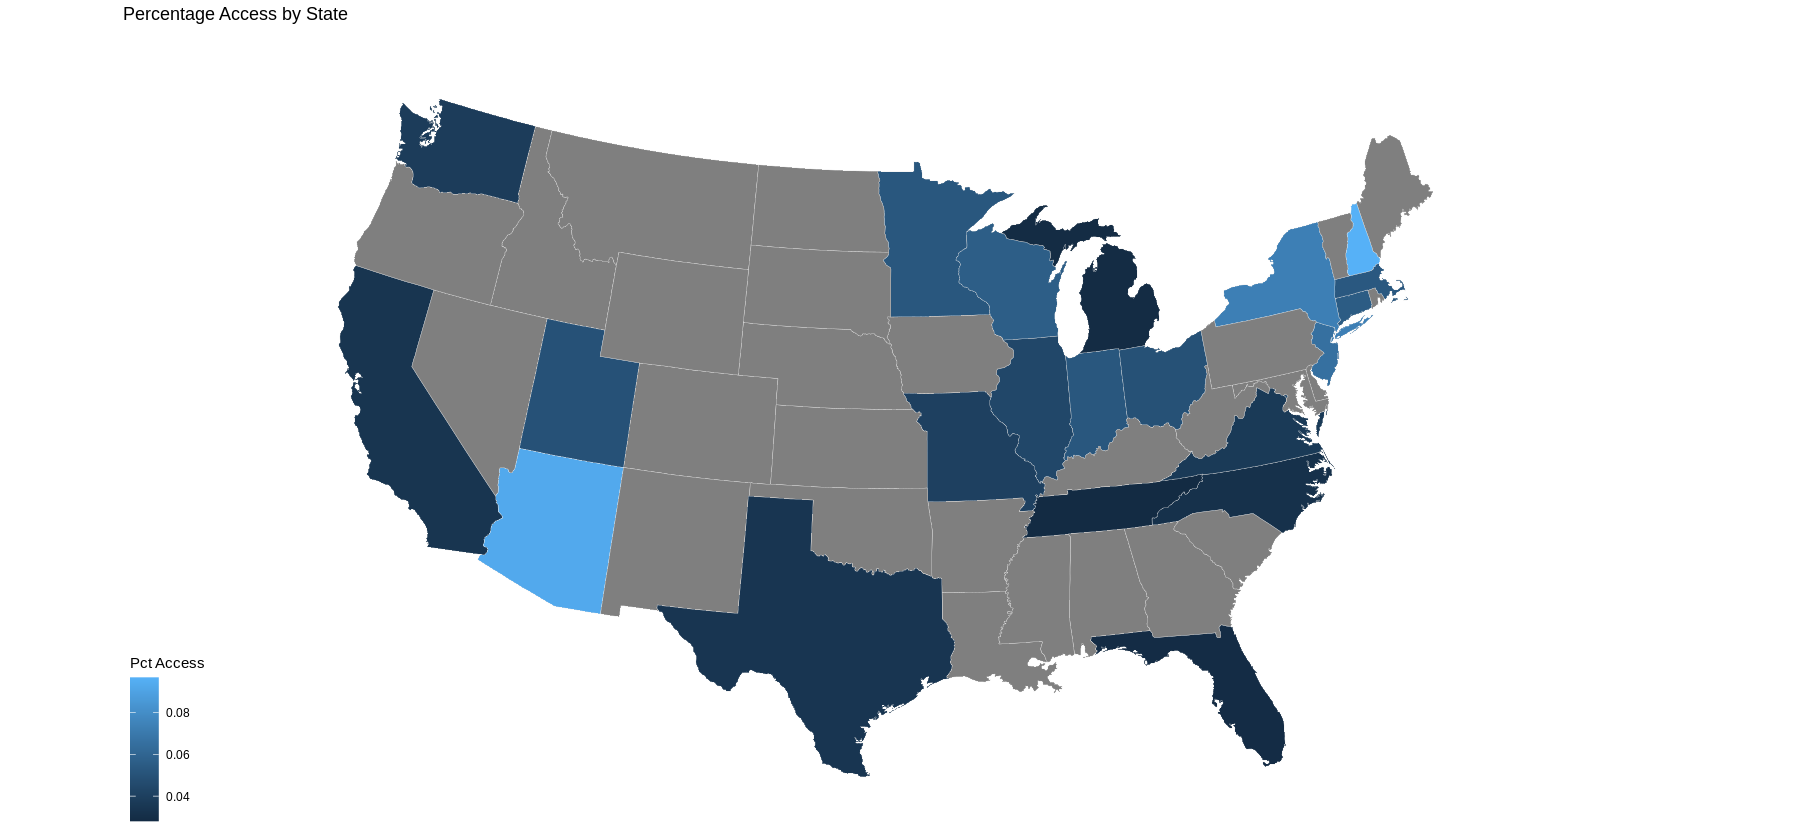

In [ ]:
library(ggthemes)
states_map <- map_data("state")
sd_ep <- sd_ep %>% mutate(region = tolower(state))
sd_ep_map <- left_join(states_map, sd_ep, by="region")
p0 <- ggplot(data = sd_ep_map,
             mapping = aes(x = long, y = lat,
                           group = group, fill = m_pa))
p1 <- p0 + geom_polygon(color = "gray90", size = 0.1) +
    coord_map(projection = "albers", lat0 = 39, lat1 = 45) 
p1 + labs(title = "Percentage Access by State") + theme_map() + labs(fill = "Pct Access")

**US Map showing Engagement Index per State**

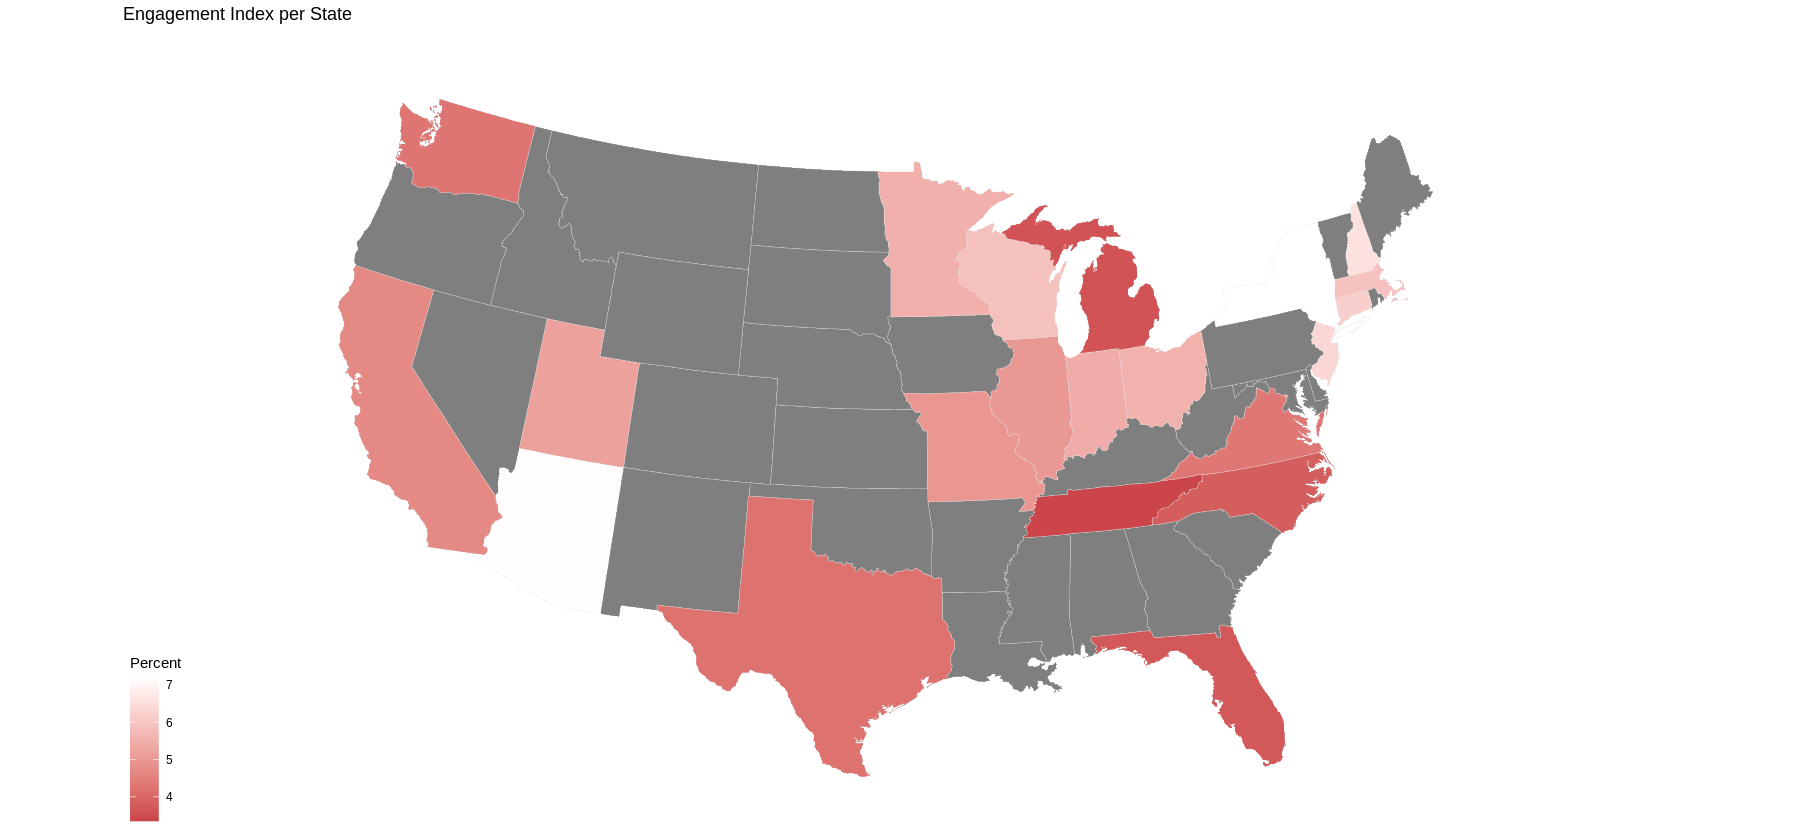

In [ ]:
p0 <- ggplot(data = sd_ep_map,
             mapping = aes(x = long, y = lat,
                           group = group, fill = m_ei))
p1 <- p0 + geom_polygon(color = "gray90", size = 0.1) +
    coord_map(projection = "albers", lat0 = 39, lat1 = 45) 
# p1 + labs(title = "Pct Access") + theme_map() + labs(fill = "Percent")
p2 <- p1 + scale_fill_gradient(low = "#CB454A", high = "white") +
        labs(title = "Engagement Index per State") 
p2 + theme_map() + labs(fill = "Percent") 

In this map chart we see data is not complete, not all states in the US are captured in the dataset. The two maps shows similar patterns between percentage access and engagement index in each state as also shown in the bar charts.

# Analysis Summary

After a thourough data processing and data visualization development, we can come up with some conclusion as follows:
1. Covid-19 pandemic has boosted usage of digital learning platform and study from home, forced every student to use it to help them get education.
2. New York, the highest engagement index state with score 7.2 score, also is the highest per-pupil expenditure state (USD18K). Whilst percentage of student eligible free (32%) and reduced (52%)m does not directly related to engagement Index.
3. District of Columbia is the highest per-pupil expenditure state, with USD18K, slightly above New York, only less than 100K user engagement, percentage access 4%, and 5.1% engagement index.
4. In contrast, Michigan, with almost half of per-pupil expenditure (USD11K), got an engagement index 3.2 score, which is on 21st position. Total user engagement below 100K. Compare to New York, Michigan has almost double 50% students eligible for free, and 70% reduced price lunch.
5. Minesotta, the highest rank of 60% students eligible for free, and 80% reduced price lunch, having a very low user engagements, however shows pretty high engagement index 5.5 score, positioned in the middle ranking.
6. New York is having 9% black and 29% hispanic students, as highest user engagement with score 7.2, while Californai with 33% black and 53% hispanic student only got score 4.7, almost half of New York.
7. Khan Academy is the best performer in digital learning platform, with 66.6K user engagement per year, shows in the scatter plot user engagement pattern is actually similar to Netflix, which is an entertainment platform in a totally different category. User engagement is high during non holiday seassons and low during holidays.
8. Some of the timeline charts above shows downtrends. This might be related to the push of vaccination in the country, and the hope that the pandemic will be end soon in 2021. While in reality the pandemic continues this year. This analysis can be used to estimate similar results for this year.

# Closing Statement

This analysis covers only for US students as in the provided dataset. We all know that Covid-19 pandemic not only happend in the US, therefore the impact on Digital Learning Platforms must also be affected to all students in any country, anywhere world wide including India. The result of the analysis might also reflected the same or similar in other countries, although, a similar analysis shall be done when the dataset is available. 
